# Lending Club Case Study- Exploratory Data Analysis


### Project Brief

This assignment will give an idea about how real business problems are solved using EDA. 
In this case study it will develop a basic understanding of risk analytics in banking and financial services and understand 
how data is used to minimise the risk of losing money while lending to customers.

### Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.
Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). 
The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed.

In other words, borrowers who default cause the largest amount of loss to the lenders.
In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.
Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. 
the variables which are strong indicators of default.The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format

# increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

 # Dataset
 It contains the complete loan data for all loans issued through the time period 2007 t0 2011.

In [2]:
# Loading data set file in to data frame.
data = pd.read_csv('loan.csv')
data.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   
2   15.96%        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0    24000.00            Verified  Dec-11   Fully Paid          n   
1    30000.00     Source Verified  Dec-11  Charged Off          n   
2    12252.00        Not Verified  Dec-11   Fully Paid          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00      5863.16          5833.84   
1                   f       0.00           0.00      1008.71          1008.71   
2                   f       0.00           0.00      3005.67          3005.67   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                     0.00       Jan-15           171.62          NaN   
1                     1.11       Apr-13           119.66          NaN   
2                     0.00       Jun-14           649.91          NaN   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             May-16                        0.00                          NaN   
1             Sep-13                        0.00                          NaN   
2             May-16                        0.00                          NaN   

   policy_code application_type  annual_inc_joint  dti_joint  \
0            1       INDIVIDUAL               NaN        NaN   
1            1       INDIVIDUAL               NaN        NaN   
2            1       INDIVIDUAL               NaN        NaN   

   verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                        NaN               0           NaN          NaN   
1                        NaN               0           NaN          NaN   
2                        NaN               0  

In [3]:
# Lower rows of data frame
data.tail(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39714  90395      90390       5000         5000          1325.00   36 months   
39715  90376      89243       5000         5000           650.00   36 months   
39716  87023      86999       7500         7500           800.00   36 months   

      int_rate  installment grade sub_grade         emp_title emp_length  \
39714    8.07%       156.84     A        A4               NaN   < 1 year   
39715    7.43%       155.38     A        A2               NaN   < 1 year   
39716   13.75%       255.43     E        E2  Evergreen Center   < 1 year   

      home_ownership  annual_inc verification_status issue_d loan_status  \
39714       MORTGAGE   100000.00        Not Verified  Jul-07  Fully Paid   
39715       MORTGAGE   200000.00        Not Verified  Jul-07  Fully Paid   
39716            OWN    22000.00        Not Verified  Jun-07  Fully Paid   

      pymnt_plan                                                url  \
39714          n  https://lendingclub.com/browse/loanDetail.acti...   
39715          n  https://lendingclub.com/browse/loanDetail.acti...   
39716          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                        title zip_code addr_state   dti  delinq_2yrs  \
39714  MBA Loan Consolidation    017xx         MA  2.30            0   
39715                JAL Loan    208xx         MD  3.72            0   
39716      Consolidation Loan    027xx         MA 14.29            1   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
39714           Oct-98               0                    0.00   
39715           Nov-88               0                    0.00   
39716           Oct-03               0                   11.00   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39714                    0.00        11        0       9698     19.40%   
39715                    0.00        17        0      85607      0.70%   
39716                    0.00         7        0       4175     51.50%   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39714         20                   f       0.00           0.00      5272.16   
39715         26                   f       0.00           0.00      5174.20   
39716          8                   f       0.00           0.00      9195.26   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
39714          1397.12          5000.00         272.16                0.00   
39715           672.66          5000.00         174.20                0.00   
39716           980.83          7500.00        1695.26                0.00   

       recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
39714        0.00                     0.00       Apr-08             0.00   
39715        0.00                     0.00       Jan-08             0.00   
39716        0.00                     0.00       Jun-10           256.59   

      next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
39714          NaN             Jun-07                         NaN   
39715          NaN             Jun-07                         NaN   
39716          NaN             Jun-10                         NaN   

       mths_since_last_major_derog  policy_code application_type  \
39714                          NaN            1       INDIVIDUAL   
39715                          NaN            1       INDIVIDUAL   
39716                          NaN            1       INDIVIDUAL   

       annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  \
39714               NaN        NaN                      

# Understanding the Dataset

In [4]:
# shape of data frame
print(data.shape)

# stats of the given dataset
data.describe()

(39717, 111)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   39717.00   39717.00   39717.00     39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45   
std    210694.13  265678.31    7456.67      7187.24          7128.45   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00   
50%    665665.00  850812.00   10000.00      9600.00          8975.00   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  \
count     39717.00    39717.00 39717.00     39717.00        39717.00   
mean        324.56    68968.93    13.32         0.15            0.87   
std         208.87    63793.77     6.68         0.49            1.07   
min          15.69     4000.00     0.00         0.00            0.00   
25%         167.02    40404.00     8.17         0.00            0.00   
50%         280.22    59000.00    13.40         0.00            1.00   
75%         430.78    82300.00    18.60         0.00            1.00   
max        1305.19  6000000.00    29.99        11.00            8.00   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
count                14035.00                 2786.00  39717.00 39717.00   
mean                    35.90                   69.70      9.29     0.06   
std                     22.02                   43.82      4.40     0.24   
min                      0.00                    0.00      2.00     0.00   
25%                     18.00                   22.00      6.00     0.00   
50%                     34.00                   90.00      9.00     0.00   
75%                     52.00                  104.00     12.00     0.00   
max                    120.00                  129.00     44.00     4.00   

       revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
count   39717.00   39717.00   39717.00       39717.00     39717.00   
mean    13382.53      22.09      51.23          50.99     12153.60   
std     15885.02      11.40     375.17         373.82      9042.04   
min         0.00       2.00       0.00           0.00         0.00   
25%      3703.00      13.00       0.00           0.00      5576.93   
50%      8850.00      20.00       0.00           0.00      9899.64   
75%     17058.00      29.00       0.00           0.00     16534.43   
max    149588.00      90.00    6311.47        6307.37     58563.68   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count         39717.00         39717.00       39717.00            39717.00   
mean          11567.15          9793.35        2263.66                1.36   
std            8942.67          7065.52        2608.11                7.29   
min               0.00             0.00           0.00                0.00   
25%            5112.31          4600.00         662.18                0.00   
50%            9287.15          8000.00        1348.91                0.00   
75%           15798.81         13653.26        2833.40                0.00   
max           58563.68         35000.02       23563.68              180.20   

       recoveries  collection_recovery_fee  last_pymnt_amnt  \
count    39717.00                 39717.00         39717.00   
mean        95.22                    12.41          2678.83   
std        688.74                   148.67          4447.14   
min          0.00                     0.00             0.00   
25%          0.00                     0.00           218.68   
50%          0.00                     0.00           546.14   
75%          0.00                     0.00          3293.16   
max      29623.35                  7002.19         36115.20   

       collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
count                    39661.00                 

# Data Cleaning

In [5]:
# Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)

# Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


In [6]:
# Removing columns which has more than 30% null values in it
print(data.shape)
data.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)
print(data.shape)

(39717, 111)
(39717, 53)


In [7]:
# Finding number of unique values in each column
data.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

#### We have to remove these columns, as these columns have only one unique value in all the rows, which will not give any usefull outcome.<br>
'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'  

In [8]:
#Dropping Columns with only one values.
print(data.shape)
data = data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'],axis=1)
print(data.shape)

(39717, 53)
(39717, 44)


In [9]:
#Finding number of unique values, printing high unique valued columns
data.nunique().sort_values(ascending=False).head(20)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
dtype: int64

#### emp_title, and title columns have more unique values

In [10]:
data.drop(['emp_title', 'title'], axis=1, inplace=True)

#### id, url, and member_id having all unique values. any one of these can be used as primary key. Let's use id as a primary key. so remove url and member id columns.

In [11]:
data.drop(['member_id', 'url'], axis=1, inplace=True)

#### total_rec_prncp,total_rec_int, total_rec_late_fee, ,collection_recovery_fee,recoveries, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv variables are valid for barrowers who already took loan. As we are only interested only in loan application details these columns can be removed. recoveries, collection_recovery_fee columns are only valid for charged off loans. Will removed these colomns.

In [12]:
data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)
data.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [13]:
# Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_length             2.71
revol_util             0.13
pub_rec_bankruptcies   1.75
dtype: float64

In [14]:
print(data.shape)
data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
print(data.shape)
# Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

(39717, 31)
(37898, 31)


Series([], dtype: float64)

#### Loan Status Column has 3 different values. we need only Fully Paid and Charged Off. So, we have to remove the rows with Current values in loan status.

In [15]:
# Removing current loan status rows
print(data.shape)
data = data[data.loan_status != 'Current']
print(data.shape)

(37898, 31)
(36800, 31)


In [16]:
# Checking unique values for term column
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [17]:
# Stripping empty space in values in term
data['term'] = data.term.str.strip()
data.term.unique()

array(['36 months', '60 months'], dtype=object)

# Data type conversions

In [18]:
# Finding datatype in all coulmns
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

#### Int_rate and revol_util are having '%' symbol values and having data type of object. removing % at the end and convert to float

In [19]:
# stripping '%' value
data['int_rate'] = data.int_rate.str.strip('%').astype(float)
data['revol_util'] = data.revol_util.str.strip('%').astype(float)

#### issue_d, earliest_cr_line are having date values, lets convert column data type to date.

In [20]:
# converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)
data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)
# Converted to proper datatypes for analysis
data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

# Derived Variables

#### create new columns from date type columns 
-  #### we are deriving new columns of weekday, month & year from the existing "issue_d" column.
-  #### Creating Approved Loan amount ratio which is a ratio of Funded Amount by investor to Requested Loan amount.

In [21]:
# issue_d column
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday

# data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

# earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')

# data type conversion of year and weekday
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)

# approved_loan_amnt_ratio
data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)

In [22]:
# Converted date formats for analysis
print(data.shape)
data.head(3)
data.dtypes

(36800, 37)


id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc                             int64
pub_rec    

# <font color='orange'> Univariate Analysis </font>

Univariate analysis explores each variable in a data set separately.
These are the possible driver variables.

loan_amnt                              
funded_amnt                            
funded_amnt_inv                    
term                                 
int_rate                             
installment                          
grade                                 
sub_grade                            
emp_length                            
home_ownership                        
annual_inc                           
verification_status                                        
loan_status                                                     
purpose                                                           
addr_state                           
dti                                                            
earliest_cr_line                                                                    
pub_rec                                                                         
pub_rec_bankruptcies                                             
issue_d_year                          
issue_d_month                         
issue_d_weekday                       
earliest_cr_line_year                 
earliest_cr_line_month                
approved_loan_amnt_ratio             

### Loan Amount 
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

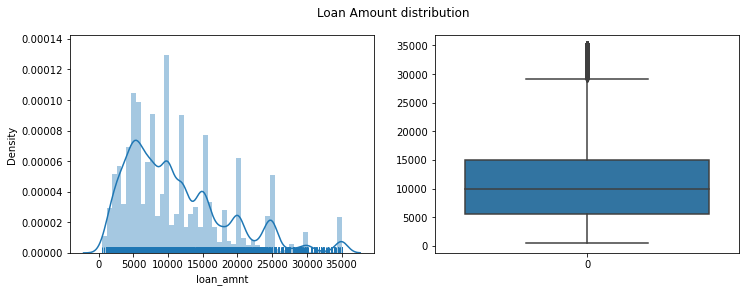

In [23]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [24]:
# Stats of laon amount
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean    11149.54
std      7369.86
min       500.00
5%       2400.00
10%      3200.00
25%      5500.00
50%     10000.00
75%     15000.00
90%     22000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

#### Observations: 
More number of people took loan amount of 10000, and also meadian of distribution is 10000.  very less people took more than 30000 loan amount.

### funded_amnt
The total amount committed to that loan at that point in time.

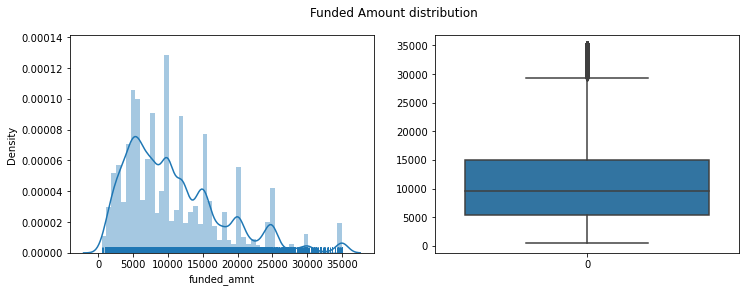

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [26]:
# Stats of funded amount
data.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean    10880.79
std      7109.16
min       500.00
5%       2400.00
10%      3200.00
25%      5400.00
50%      9600.00
75%     15000.00
90%     20375.00
95%     25000.00
99%     35000.00
max     35000.00
Name: funded_amnt, dtype: float64

#### Observations:
Funded amount data behaves similar to loan Amount, that means Lender approved most of Applied loan amount.

### funded_amnt_inv
The total amount committed by investors for that loan at that point in time.

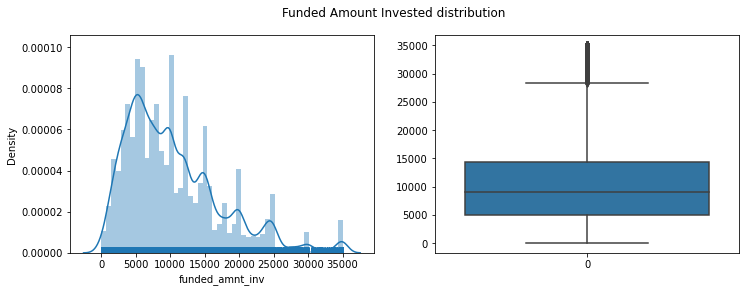

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [28]:
#Stats of funded_amnt_inv
data.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean    10439.06
std      7008.52
min         0.00
5%       2000.00
10%      3000.00
25%      5000.00
50%      9000.00
75%     14350.00
90%     20000.00
95%     24655.82
99%     34725.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

#### Observations:
Funded amount investment data behaves similar to loan Amount, that means  Lender approved most of the Applied loan amount.

### Approved Loan Amount Ratio

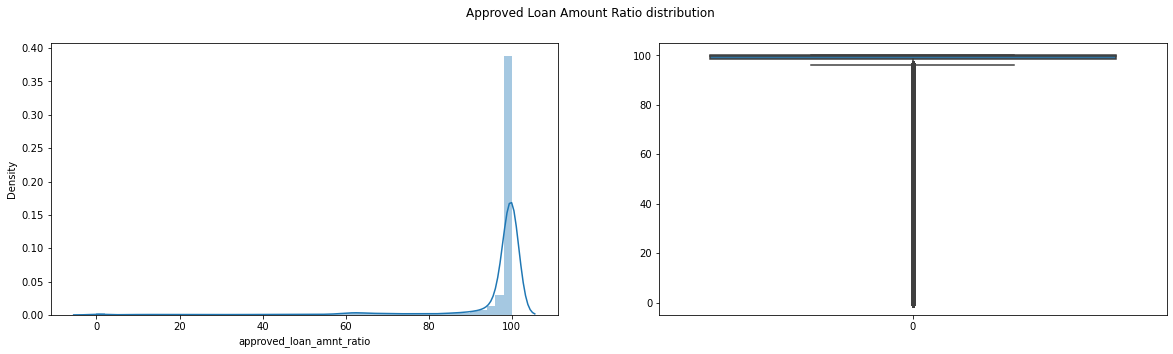

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=data.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(data=data.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

#### Observations:
70% of Borrowers got 100% loan amount from investors.

### Interest Rate

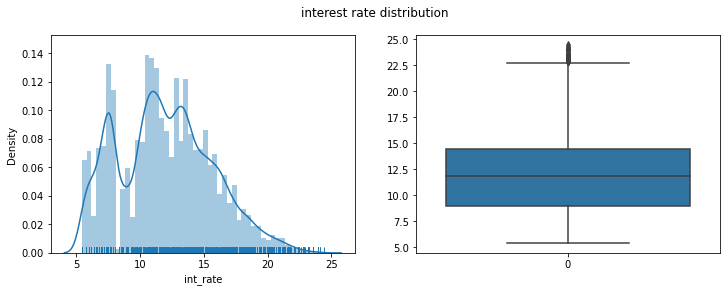

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

#### Observations:
From the above plots and statistics of interest rates we can conclude that most of the interest rates lies between 9% to 14.5%. Some borrowers took loan at higher rates of interest i.e., 22.5%

### Installment

The monthly payment owed by the borrower if the loan originates.

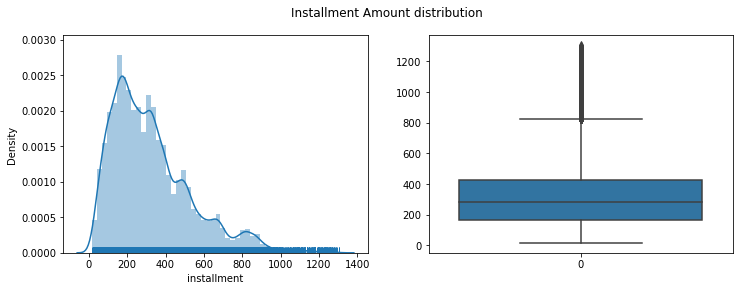

In [31]:
installment = data.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

#### Observations: 
Most representative value of Installment amount is around 250 to 300.

### annual_inc

The self-reported annual income provided by the borrower during registration.

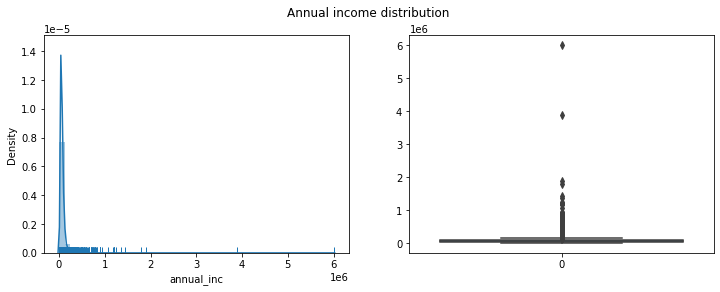

In [32]:
var1 = data.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()

### DTI

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

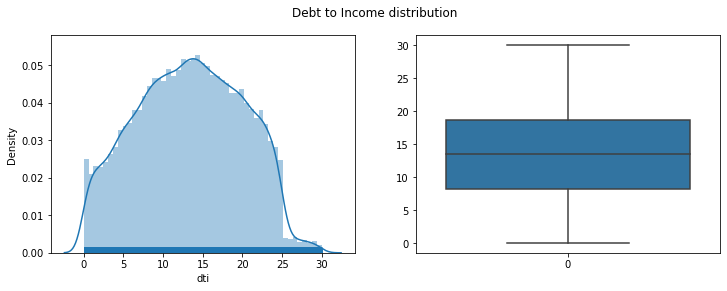

In [33]:
var1 = data.dti
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Debt to Income distribution')
plt.show()

#### Observations:
There are no outliers and the distribution is  much similar to normal distribution. <br>
All the loans are given to barrower's who have Debt to Income ration less than 30.

### Pub rec

Number of Public derogatory records

Text(0.5, 1.0, 'pub_rec Distribution')

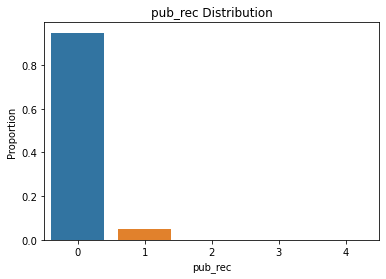

In [34]:
var = 'pub_rec'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

#### Observations:
Near about 90% borrower's having no public derogatory records.

### pub_rec_bankruptcies

Number of public record bankruptcies

Text(0.5, 1.0, 'pub_rec_bankruptcies Distribution')

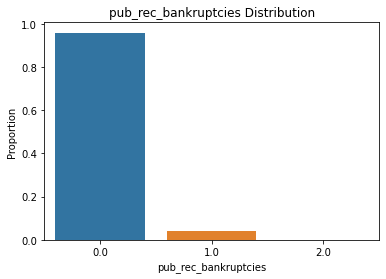

In [35]:
var = 'pub_rec_bankruptcies'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

#### Observations:
99% borrowers have not went bankrupt.

### Loan issue date (issue_d)

The month which the loan was funded

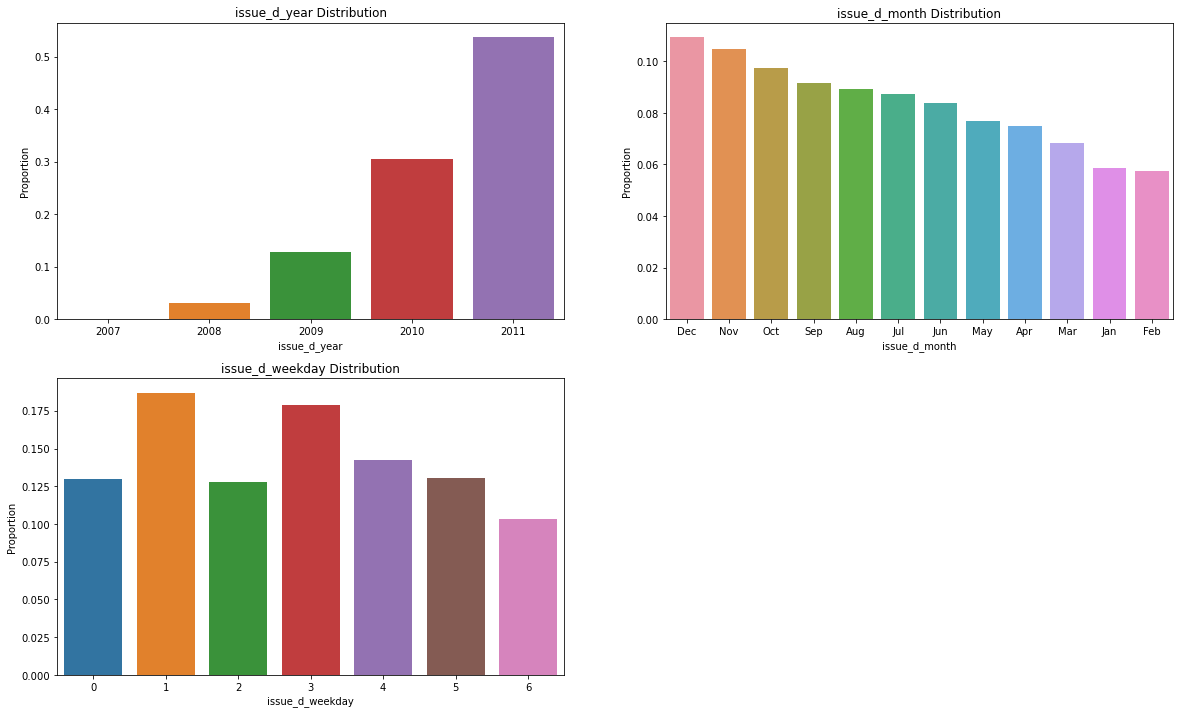

In [36]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

#### Observations:
The lending club has doubling loan issues every year. There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec. Lending club  has issued more loans on tuesday and thursday than other week days.

### Erliest Credit line (earliest_cr_line)

The month the borrower's earliest reported credit line was opened

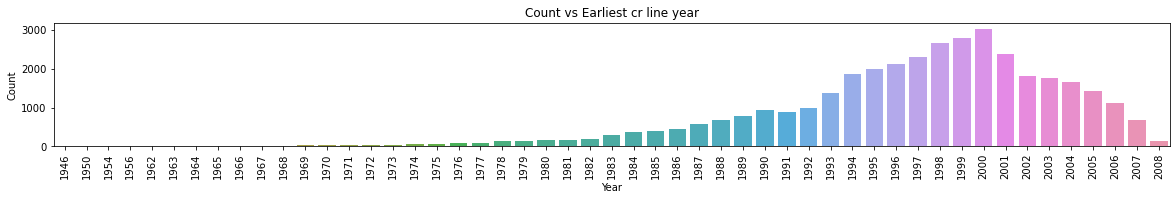

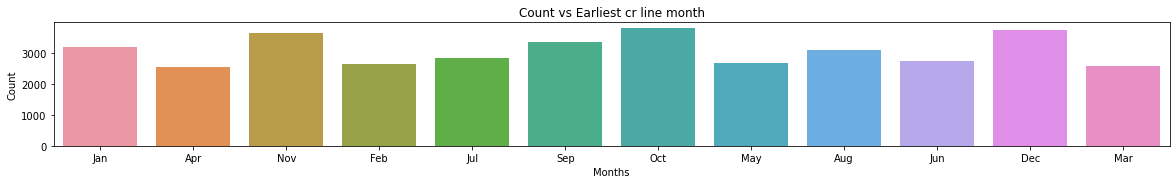

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(data.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(data.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

#### Observations:
Many of Loan borrowers of Lender have got earlier credit line in 2000 year, and also most have got earlier credit line on end of the year i.e., Oct, Nov, Dec

### Term
The number of payments on the loan. Values are in months and can be either 36 or 60.


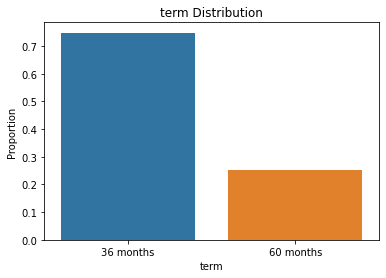

In [38]:
var = 'term'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations:
Borrowers have taken 36 months tenure more than 60 months.

### Grade

LC assigned loan grade

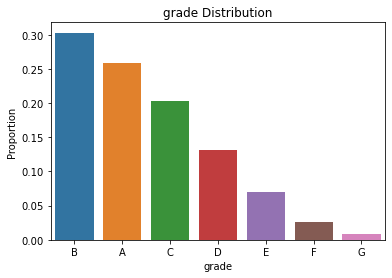

In [39]:
var = 'grade'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations:
Most borrowers fall under A and B grades then other grades

### Sub Grade

LC assigned loan subgrade

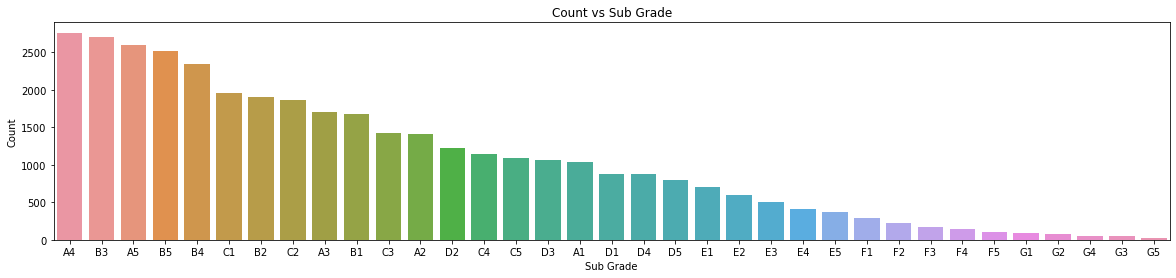

In [40]:
plt.figure(figsize=(20,4))
sns.countplot(data.sub_grade, order=data.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

#### Observations:
All sub grades are gradually decrEses from A TO G.

### Employment length
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


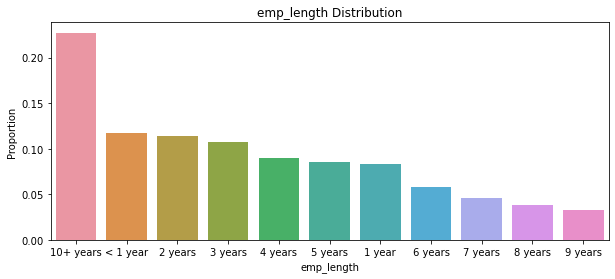

In [41]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations:
Borrowers are mostly 10+ years emploment length.

### Home Ownership
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.


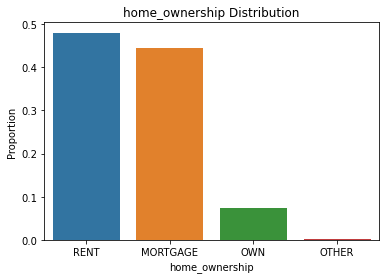

In [42]:
var = 'home_ownership'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations:
The loan borrowers are mostly having rented and mortgage houses.

### Verification Status
Indicates if income was verified by LC, not verified, or if the income source was verified

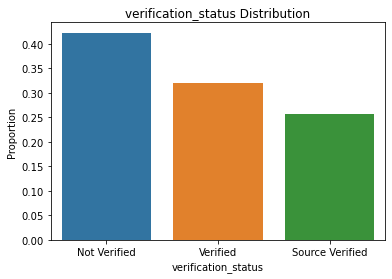

In [43]:
var = 'verification_status'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations:
Majority of loans were given without verification of applicants income.

### Loan Status
Current status of the loan

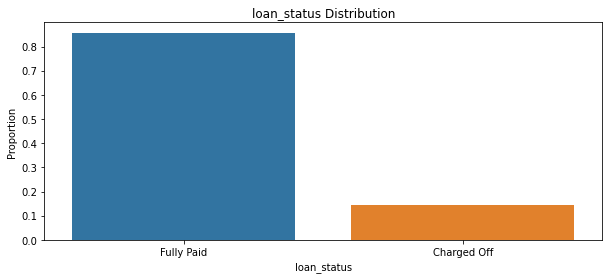

In [44]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations:
85% of borrowers has paid the loan fully. where are 14% are defaulted the loan.

### Purpose
A category provided by the borrower for the loan request. 

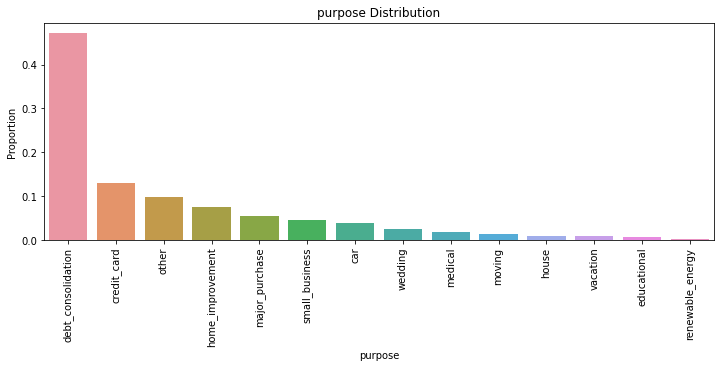

In [45]:
plt.figure(figsize=(12,4))
var = 'purpose'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations:
More number of people took loan for debt consolidation and a very few people took for renewable energy

### Borrower's State
The state provided by the borrower in the loan application

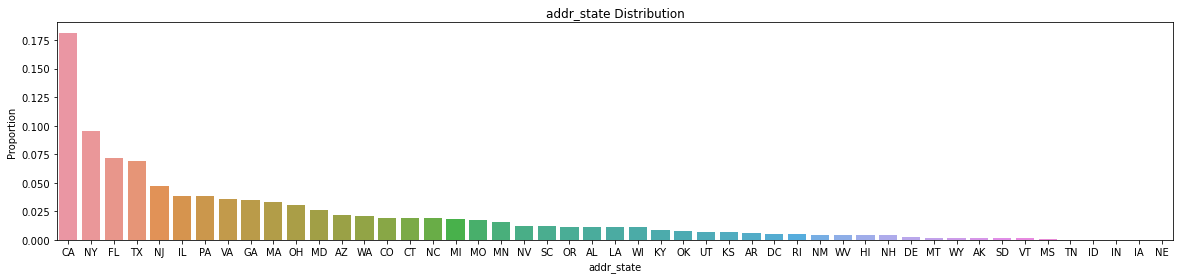

In [46]:
plt.figure(figsize=(20,4))
var = 'addr_state'

#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations:
Most of the borrowers are from CA and NY

# <font color='orange'> Segmented Univariate Analysis </font>

Segmented univariate analysis can show the change metric in pattern across the different segments of the same variable.
following are the variables on which we are applying ssegmented analysis.

Loan Amount <br>
Funded Amount <br>
Intrest Rate <br>
Anual Income <br>
DTI <br>
Public record <br>
Public Record Bankcurapcy <br>
inq_last_6mths <br>
Approval loan amount ratio 

### Loan Amount

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

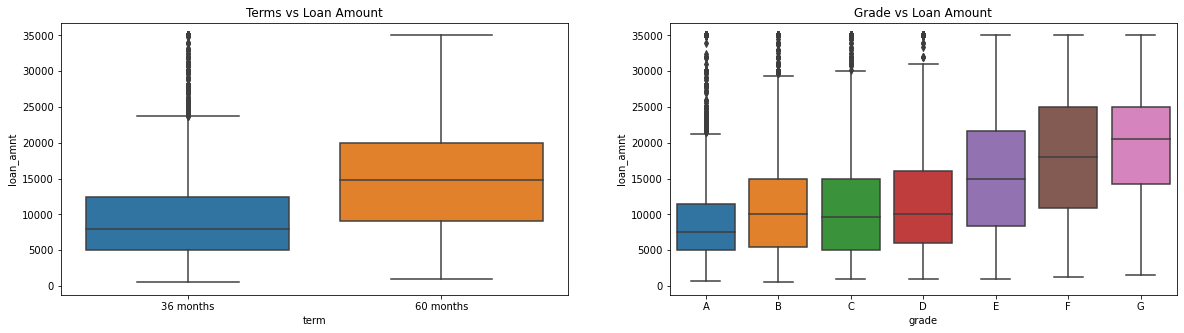

In [47]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

#### Observations:
Higher amount loans have high tenure i.e, 60 months. Grade 'F' and 'G' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

<AxesSubplot:title={'center':'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

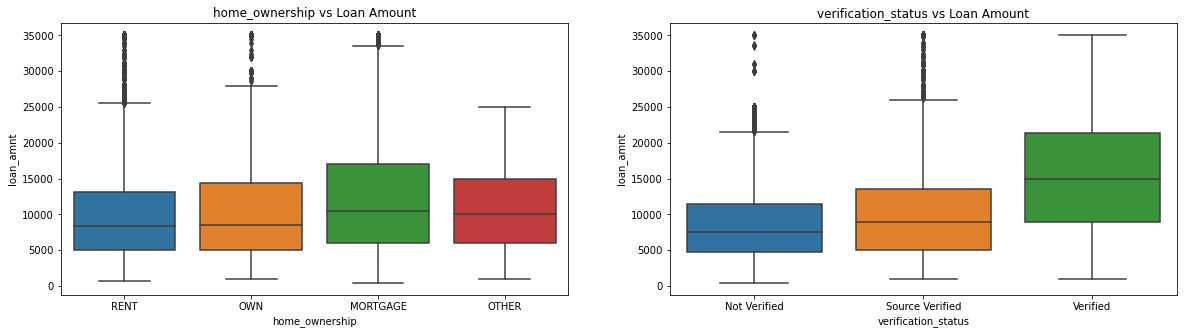

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.loan_amnt, order = verification_status_ord, data=data)

#### Observations:
More borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers. And most of borrowers are verified for borrowing loan >9k

Text(0.5, 1.0, 'loan_status vs Loan Amount')

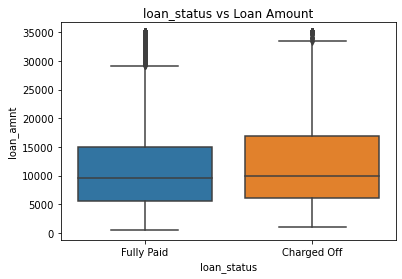

In [49]:
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

#### Observations:
Charged Off loans have higher amounts than Fully Paid ones.

Text(0.5, 1.0, 'purpose vs Loan Amount')

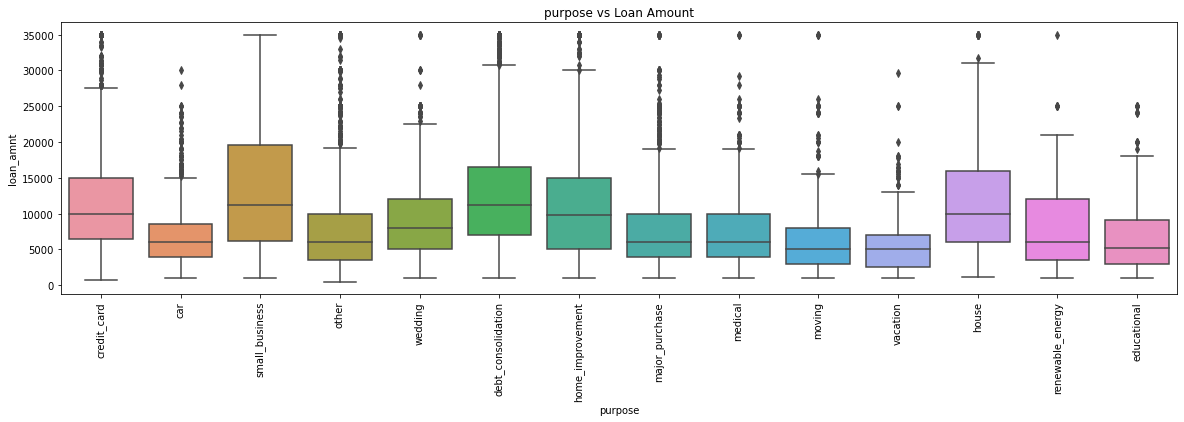

In [50]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

#### Observations:
More loan amount is from the Small bussiness.

Text(0.5, 1.0, 'emp_length vs Loan Amount')

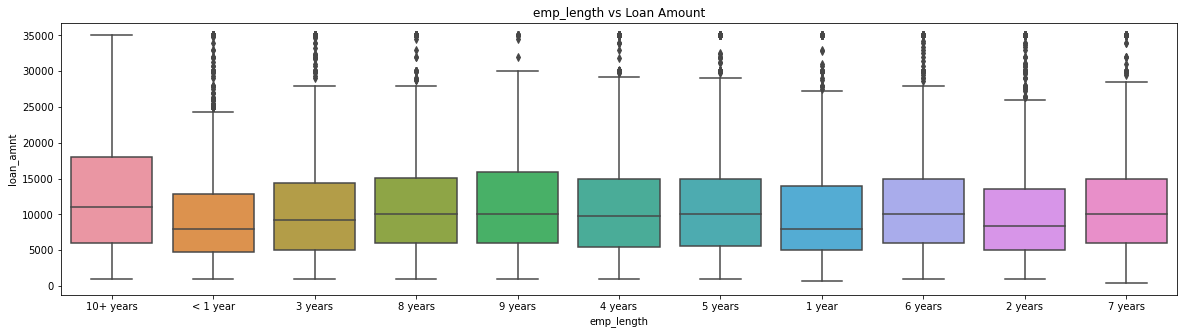

In [51]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('emp_length vs Loan Amount')

#### Observations:
More borrowers are from 10+ years and least is <1 year

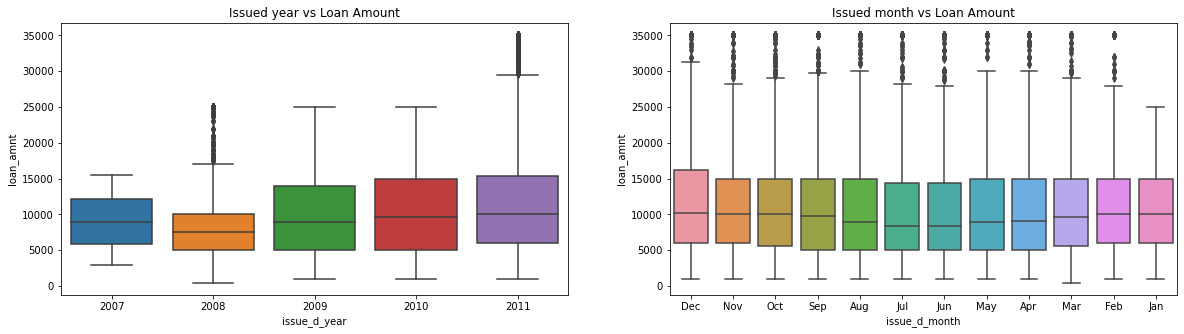

In [52]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.loan_amnt, data=data)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.loan_amnt, data=data)
plt.title('Issued month vs Loan Amount')
plt.show()

#### Observations:
The median loan amount in each year did not change much but the distribution is more spread as the years increase, which means people have taken different loan amounts in each year. <br> In December, people have taken heigher amounts as distribution goes high above median.

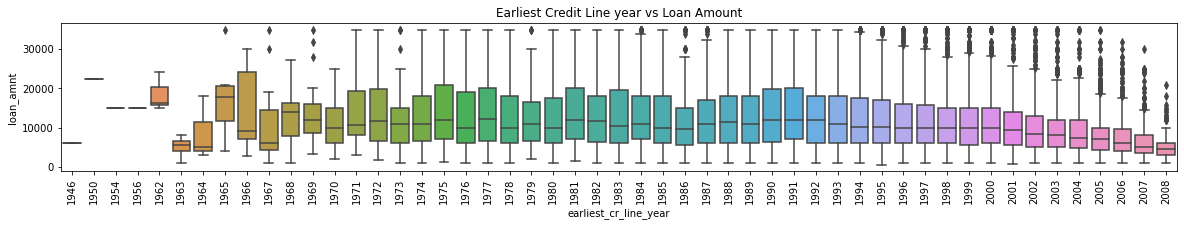

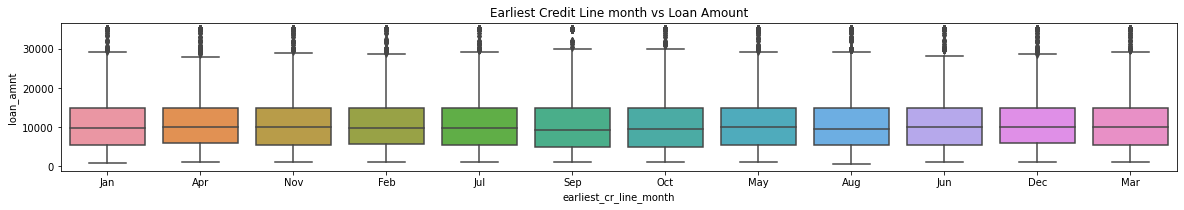

In [53]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.loan_amnt, data=data)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.loan_amnt, data=data)
plt.title('Earliest Credit Line month vs Loan Amount')
plt.show()

#### Observations:
Borrowers who go earliest credit line in 1966 got wide spreaded amount of loans than others.

### funded_amnt

<AxesSubplot:title={'center':'Grade vs funded amount'}, xlabel='grade', ylabel='funded_amnt'>

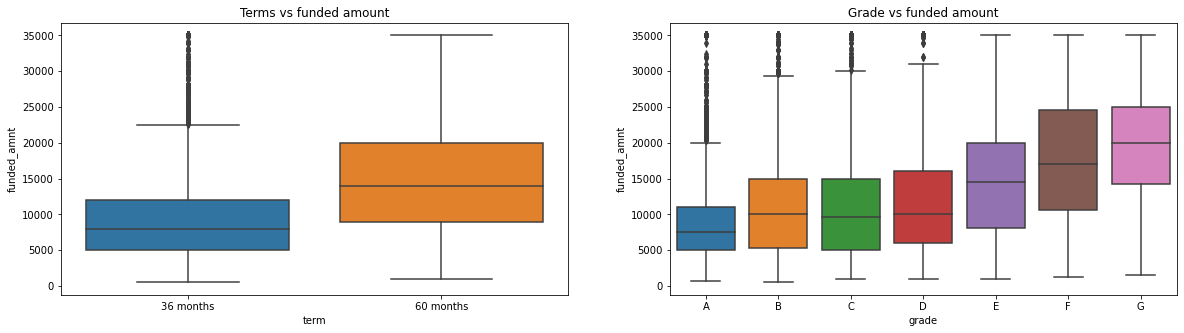

In [54]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.funded_amnt, data=data)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.funded_amnt, order = grade_ord, data=data)

#### Observations:
More borrowers lies between 60 months tenure.Grades F & G lies in more funded amount.

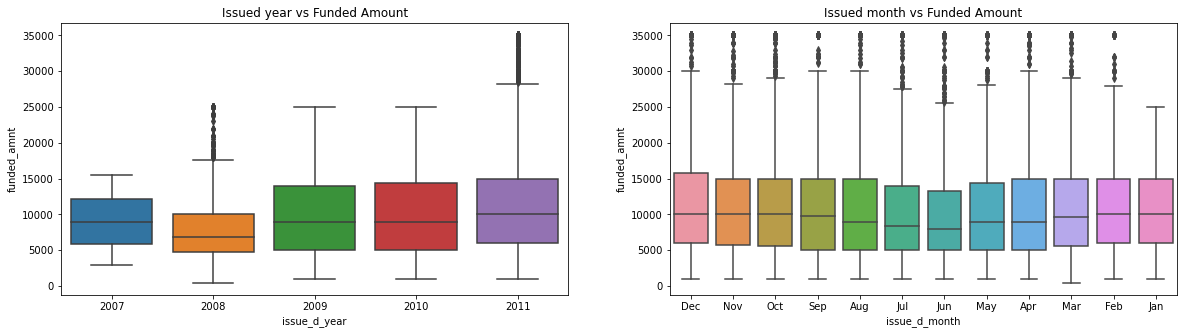

In [55]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.funded_amnt, data=data)
plt.title('Issued year vs Funded Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.funded_amnt, data=data)
plt.title('Issued month vs Funded Amount')
plt.show()

#### Observations:
Year 2009,2010,2011 have pritty much same funded amount.

Text(0.5, 1.0, 'loan_status vs Funded amnt')

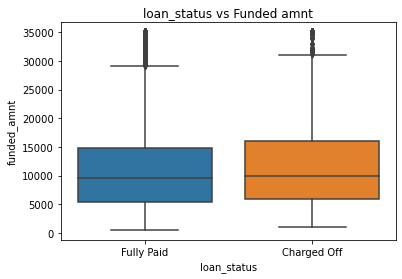

In [56]:
sns.boxplot(x='loan_status', y=data.funded_amnt, data=data)
plt.title('loan_status vs Funded amnt')

#### Observations: 
Funded amount for charged off is slightly more than fully paid.

Text(0.5, 1.0, 'purpose vs funded amount')

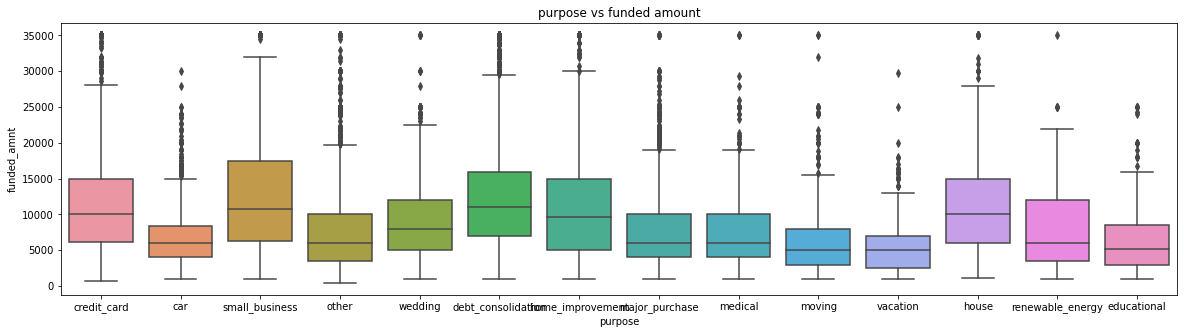

In [57]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.funded_amnt, data=data)
plt.title('purpose vs funded amount')

#### Observations:
Funded amount is more for small buisness purpose than other purposes.

Text(0.5, 1.0, 'emp_length vs funded amount')

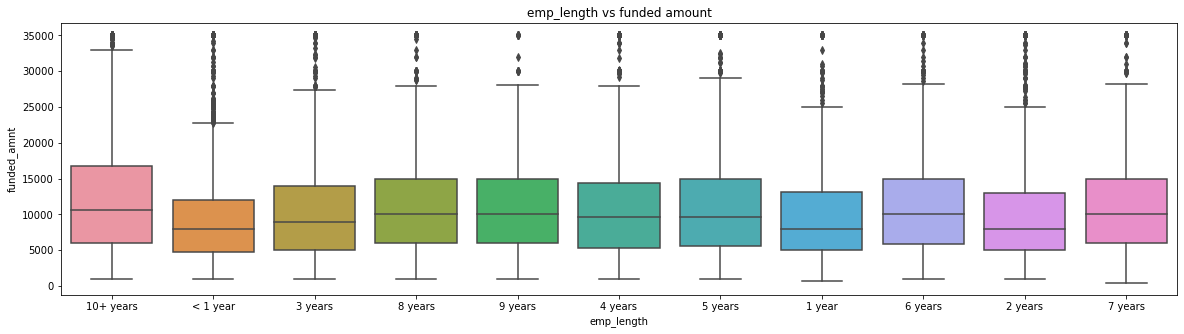

In [58]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.funded_amnt, data=data)
plt.title('emp_length vs funded amount')

#### Observations:
Funded amount is higher for 10+ years emp length.

### int_rate

<AxesSubplot:title={'center':'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

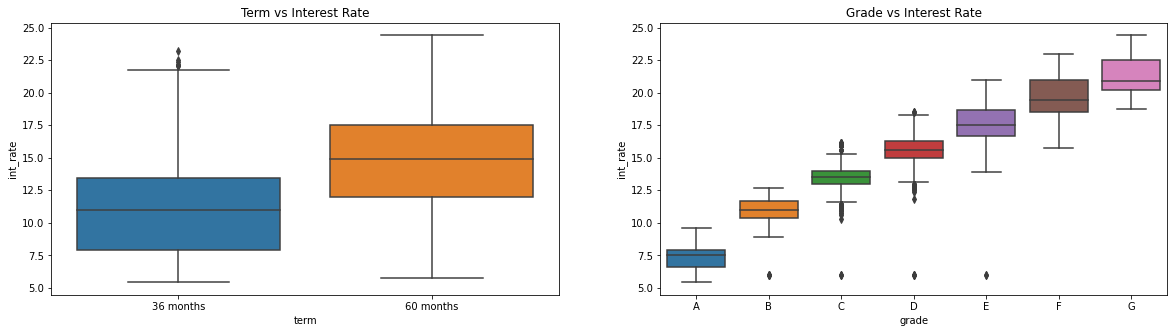

In [59]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.int_rate, data=data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.int_rate, order = grade_ord, data=data)

#### Observations:
The interest rates are higher for Higher tenure loans. And Also Interest Rates are Higher as Grades are Lowering from A TO G.

<AxesSubplot:title={'center':'verification_status vs Interest Rate'}, xlabel='verification_status', ylabel='int_rate'>

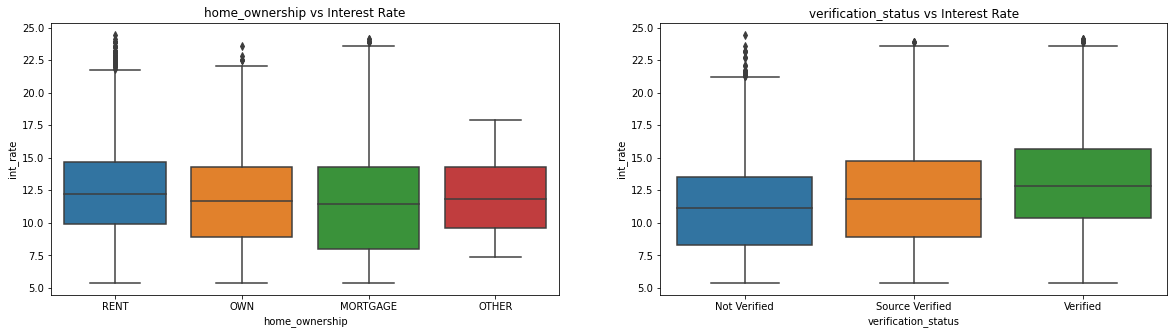

In [60]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.int_rate, data=data)
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.int_rate, order = verification_status_ord, data=data)

#### Observations:
Barrowers with Own and Mortgage got loans with less interest rates. And the non verified Barrowers got less interest rates compared to Verified and Source Verified barrowers.

Text(0.5, 1.0, 'loan_status vs Interest Rate')

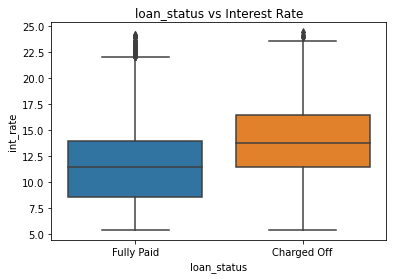

In [61]:
sns.boxplot(x='loan_status', y=data.int_rate, data=data)
plt.title('loan_status vs Interest Rate')

#### Observations:
Higher the interest rate more the chance of Defaulting the loan.

Text(0.5, 1.0, 'purpose vs Interest Rate')

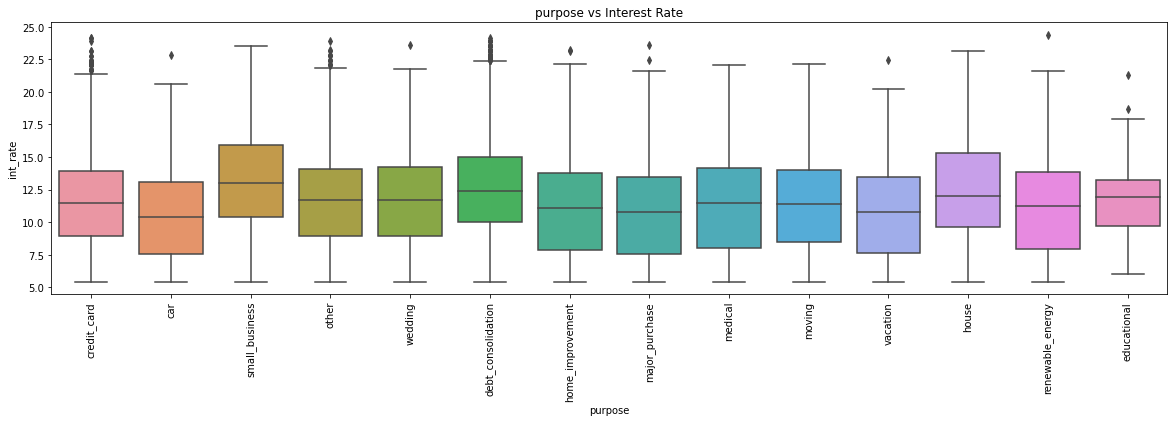

In [62]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.int_rate, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')

#### Observations:
Small Business, Debt Consolidation and House loans are given with more interest rates compare to  others.

Text(0.5, 1.0, 'emp_length vs Interest Rate')

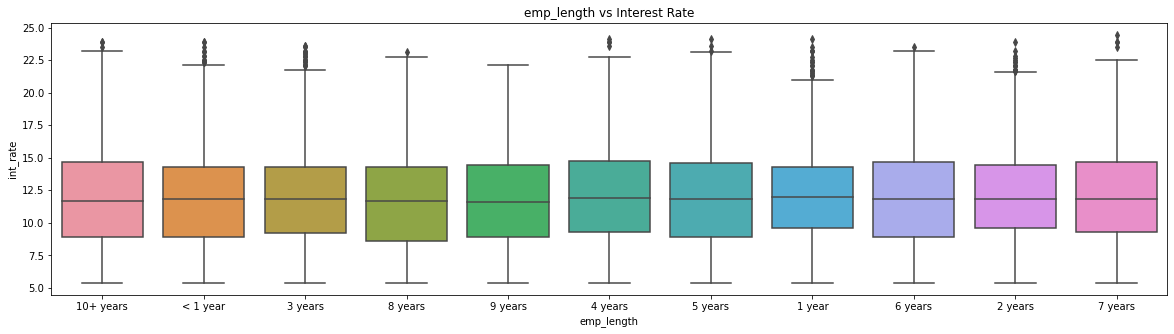

In [63]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.int_rate, data=data)
plt.title('emp_length vs Interest Rate')

#### Observations: 
There is not such relation found between Employment length and interest rate.

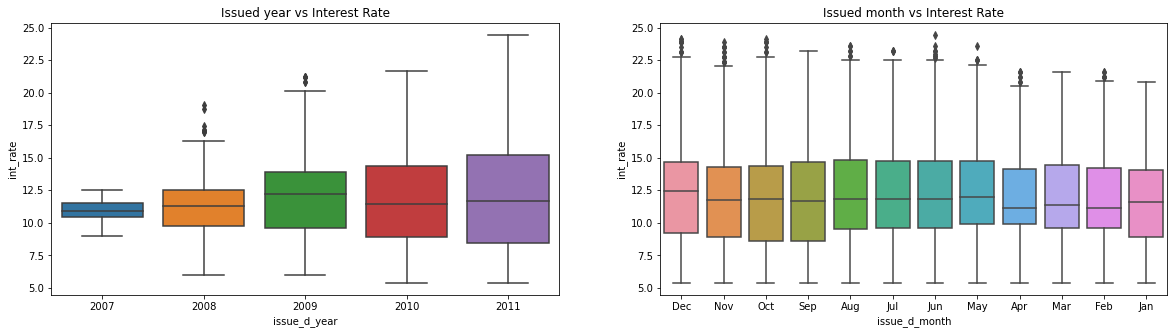

In [64]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.int_rate, data=data)
plt.title('Issued year vs Interest Rate')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.int_rate, data=data)
plt.title('Issued month vs Interest Rate')
plt.show()

#### Observations:
As the years of business increase the interest rates are getting more different,median of of interest rate is bit same in all the years

### annual_inc

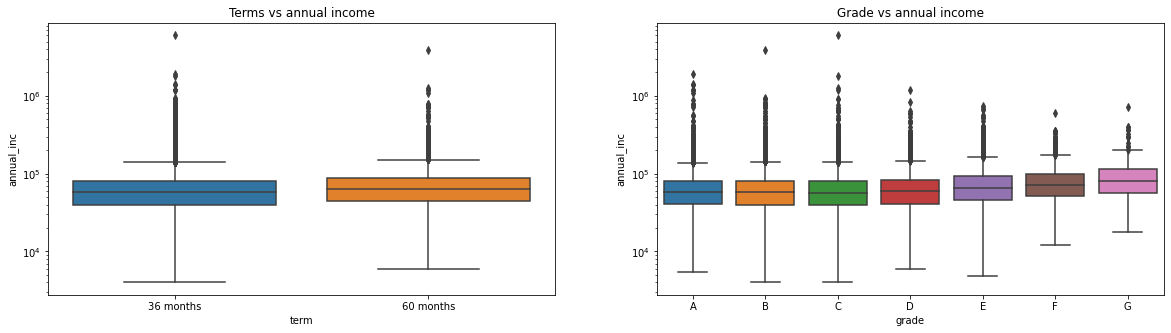

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.annual_inc, data=data)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.annual_inc, order = grade_ord, data=data)
plt.yscale('log')

#### Observations:
Annual income is higher for lower grades(F & G).

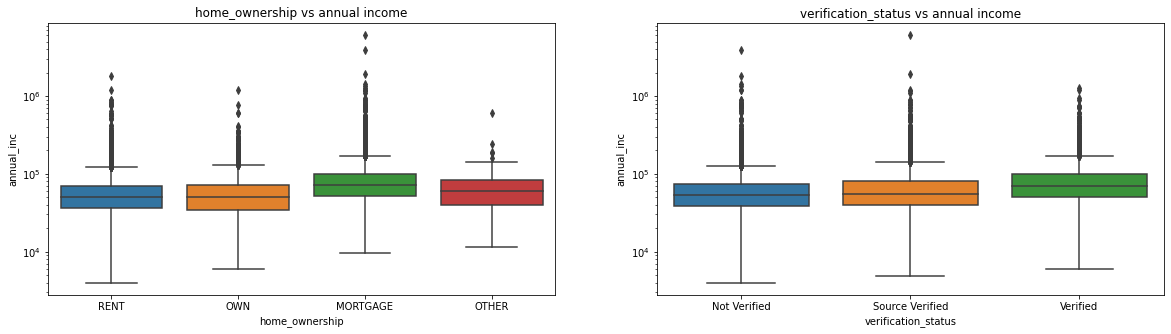

In [66]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.annual_inc, data=data)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.annual_inc, order = verification_status_ord, data=data)
plt.yscale('log')

#### Observations:
The home ownership status for mortage has higher income. The income source was verfied for most of the borrowers who had higher annual incomes.

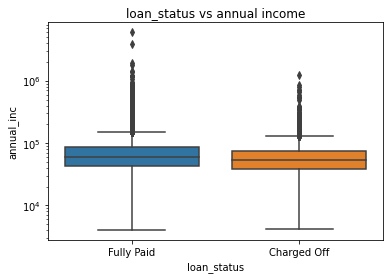

In [67]:
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)
plt.title('loan_status vs annual income')
plt.yscale('log')

#### Observations:
Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.

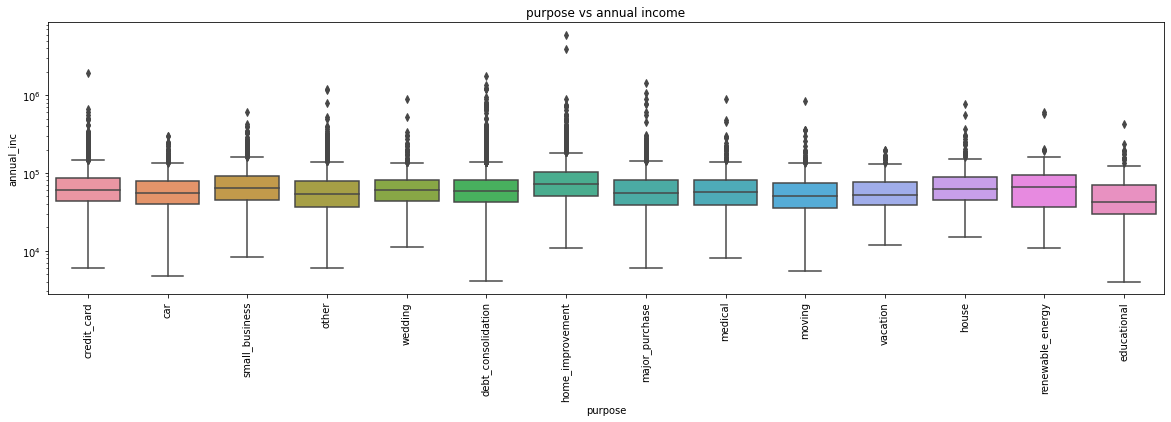

In [68]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

#### Observations:
A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request.

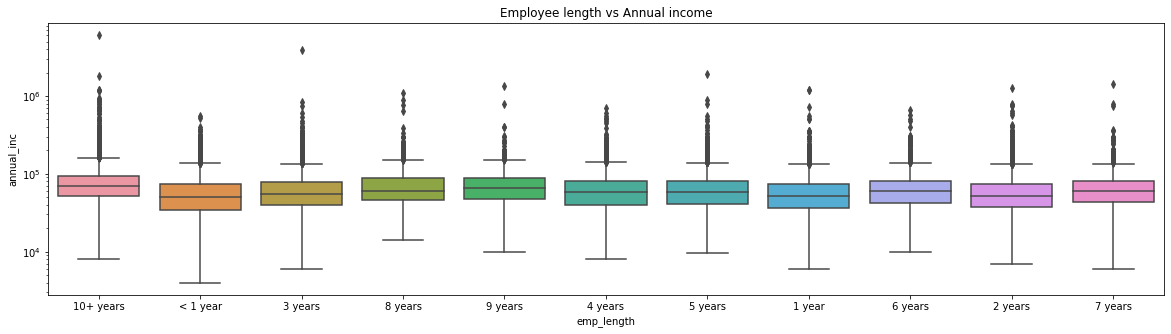

In [69]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.annual_inc, data=data)
plt.title('Employee length vs Annual income')
plt.yscale('log')

#### Observations:
The borrowers who has higer income have taken loans for 10+ years of duration.

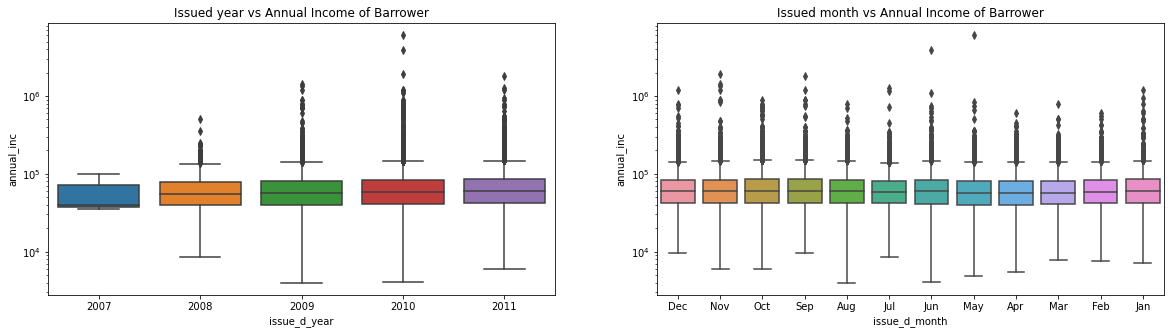

In [70]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.annual_inc, data=data)
plt.title('Issued year vs Annual Income of Barrower')
plt.yscale('log')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Annual Income of Barrower')
plt.yscale('log')
plt.show()

#### Observations:
Annual income has no impact with the month.

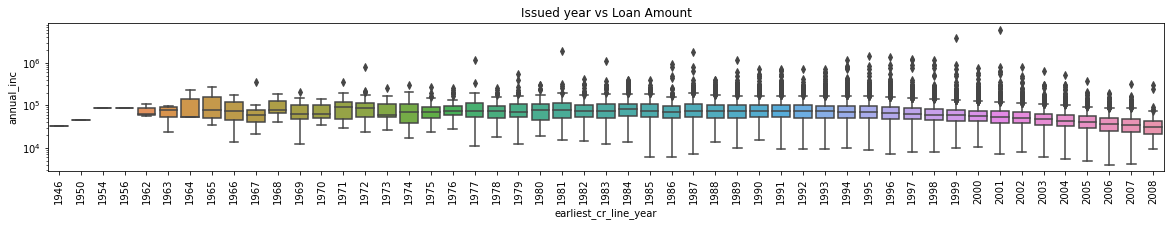

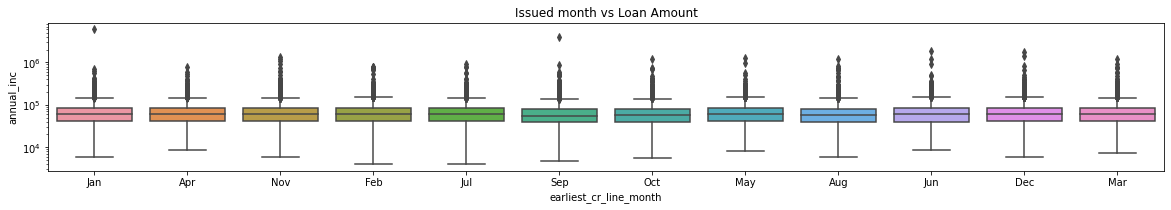

In [71]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.annual_inc, data=data)
plt.xticks(rotation=90)
#for better analysis plotting on log scale of y values
plt.yscale('log')
plt.title('Issued year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Loan Amount')
plt.yscale('log')
plt.show()

#### Observations:
There is not particular pattern in the annual income and earliest Credit line year and month.

### DTI

Debt to Income Ratio

<AxesSubplot:title={'center':'Grade vs dti'}, xlabel='grade', ylabel='dti'>

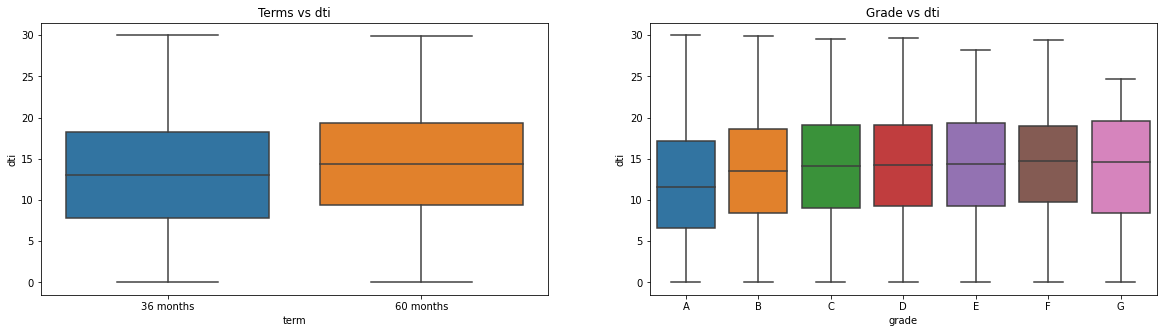

In [72]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.dti, data=data)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.dti, order = grade_ord, data=data)

#### Observations:
DTI is bit high for people who got tenure  of 60 months. A Grade barrowers are having low DTI than Other grades. DTI should be low for having high repayment percentage.

<AxesSubplot:title={'center':'verification_status vs dti'}, xlabel='verification_status', ylabel='dti'>

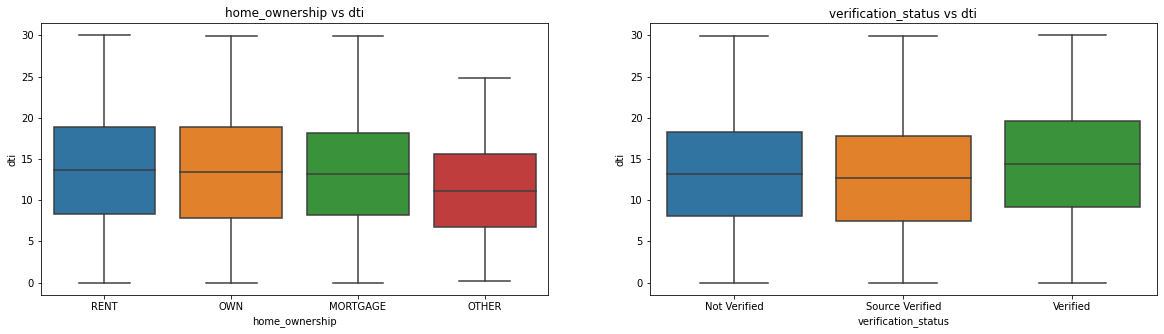

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.dti, data=data)
plt.title('home_ownership vs dti')
plt.subplot(122)
plt.title('verification_status vs dti')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.dti, order = verification_status_ord, data=data)

#### Observations:
People in Other home ownership has less DTI than others. This is may be bacause other people have mortgage and home loans.

Text(0.5, 1.0, 'loan_status vs dti')

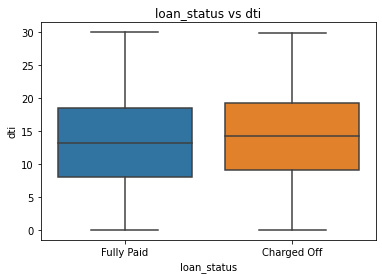

In [74]:
sns.boxplot(x='loan_status', y=data.dti, data=data)
plt.title('loan_status vs dti')

#### Observations:
Borrowers with high DTI has bit more probability to default

Text(0.5, 1.0, 'purpose vs dti')

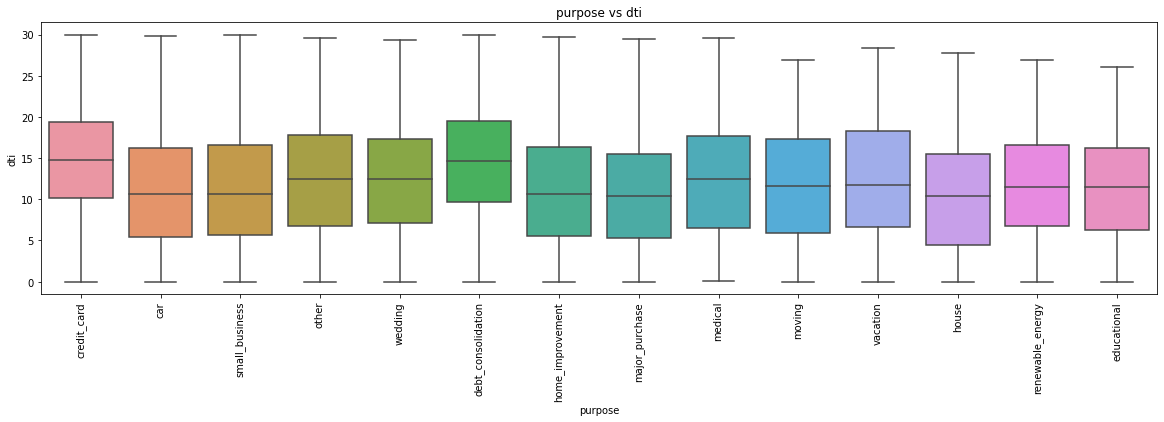

In [75]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.dti, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

#### Observations:
Borrowers who took loan for credit card and debt consolidation purpose has more DTI than other purposes.

Text(0.5, 1.0, 'emp_length vs dti')

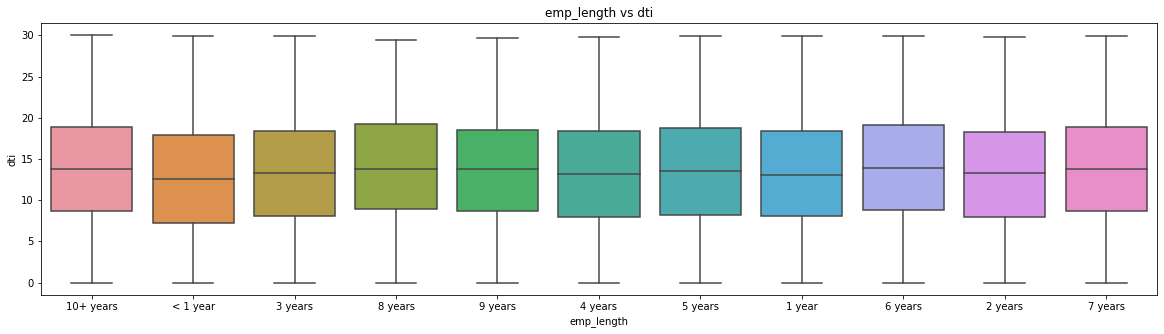

In [76]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.dti, data=data)
plt.title('emp_length vs dti')

#### Observations:
The dti is much similar for borrowers with all the employment length.

### pub_rec

Number of derogatory public records

In [77]:
#Finding proportation of values in each value of category
df = data.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df.head(3)

pub_rec       term     id  proportion
0        0  36 months  26152        0.75
1        0  60 months   8719        0.25
2        1  36 months   1349        0.72

<AxesSubplot:title={'center':'Grade vs Public records'}, xlabel='pub_rec', ylabel='proportion'>

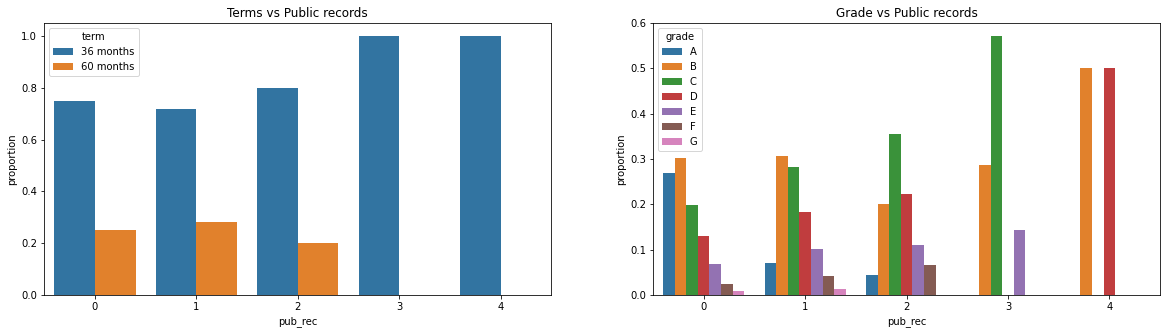

In [78]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)
plt.title('Terms vs Public records')

df = data.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
plt.title('Grade vs Public records')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)

#### Observations:
Borrowers higher public derogatory records took loan for 36 months tenure.  <br>   A grade people are having less derogatory records than the other grades. B,C,D, graded people are having high pub_recs.

Text(0.5, 1.0, 'Verification status vs Public records')

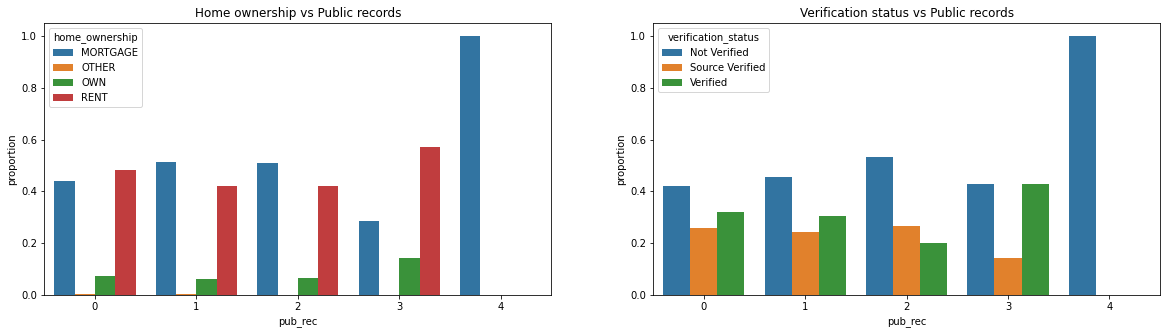

In [79]:
plt.figure(figsize=(20,5))
plt.subplot(121)

df = data.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
plt.title('Home ownership vs Public records')

df = data.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)

plt.title('Verification status vs Public records')

#### Observations:
Borrowers with 4 public Derogatory records are high in mortgage owned house category and also Not verified Catogry.

Text(0.5, 0.98, 'loan status vs Public records')

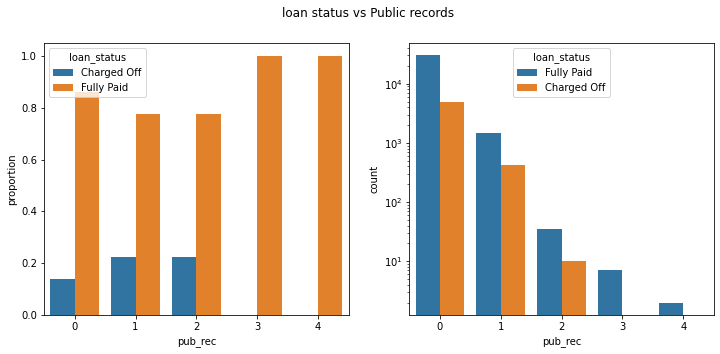

In [80]:
#Proportion of values for each category
df = data.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)

plt.subplot(122)
sns.countplot(data.pub_rec, hue='loan_status', data=data)
plt.yscale('log')
plt.suptitle('loan status vs Public records')

#### Observations:
There is increase in deafulted loans for borrowers with derogatory records from 0 to 2. Most borrowers are in 0 pub_rec category.

Text(0.5, 1.0, 'Purpose vs Public records')

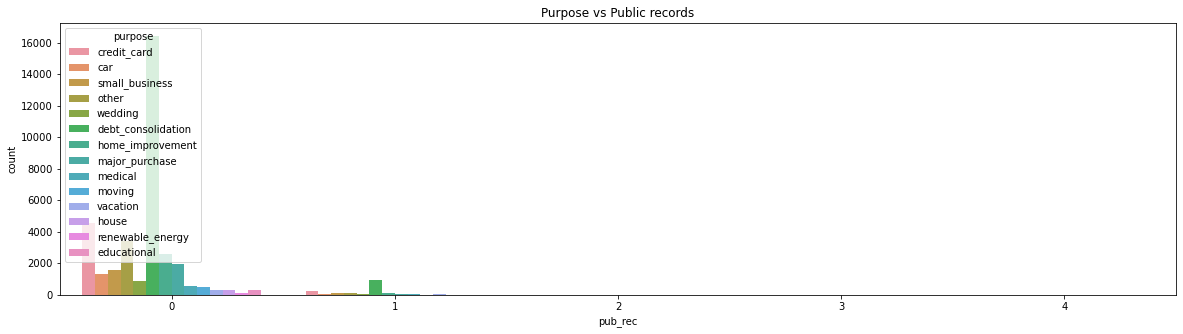

In [81]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec, hue='purpose', data=data)
plt.title('Purpose vs Public records')

#### Observations:
There is high amount of debt cansolidation borrowers.

Text(0.5, 1.0, 'Employee length vs Public records')

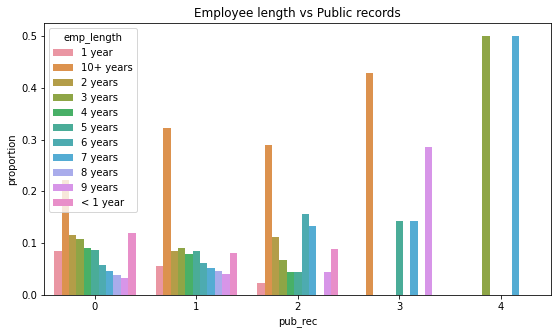

In [82]:
plt.figure(figsize=(20,5))
#Proportion of values for each category
df = data.groupby(['pub_rec', 'emp_length'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='emp_length', data=df)
plt.title('Employee length vs Public records')

#### Observations:
There is more number of 3 year & 7 year emp lenth borrowers. 

### pub_rec_bankruptcies

Number of public record bankruptcies

<AxesSubplot:title={'center':'Grade vs Public record bankruptcies'}, xlabel='pub_rec_bankruptcies', ylabel='count'>

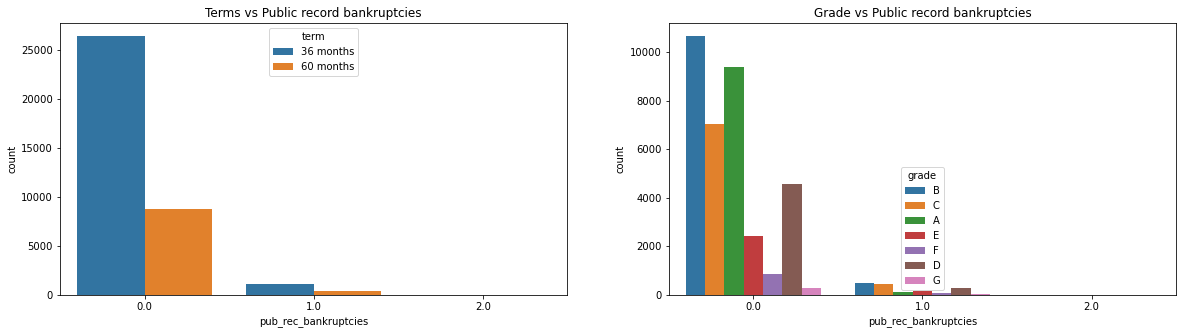

In [83]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec_bankruptcies, hue='term', data=data)
plt.title('Terms vs Public record bankruptcies')
plt.subplot(122)
plt.title('Grade vs Public record bankruptcies')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='grade', data=data)

#### Observations:
36 months tenure borrowers are in large amount than 60 months tenure. Grades B,C,A are higher than other grades when compared with pub rec bankcruptcies.

<AxesSubplot:title={'center':'Verification status vs Public record bankruptcies'}, xlabel='pub_rec_bankruptcies', ylabel='count'>

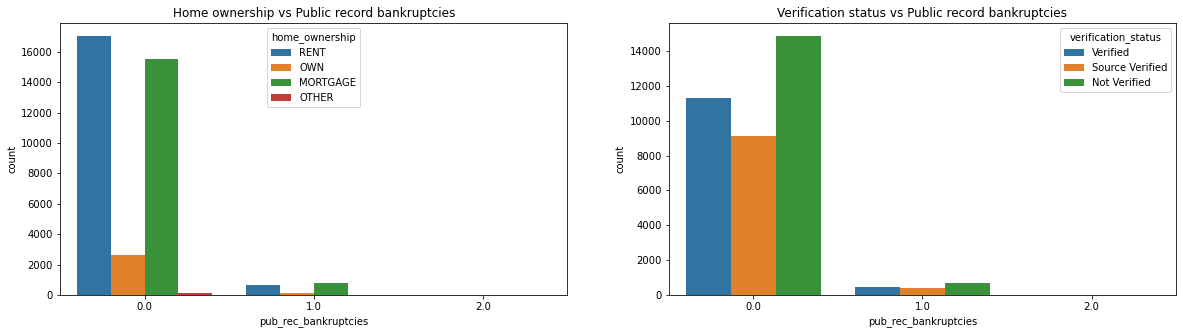

In [84]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec_bankruptcies, hue='home_ownership', data=data)
plt.title('Home ownership vs Public record bankruptcies')
plt.subplot(122)
plt.title('Verification status vs Public record bankruptcies')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='verification_status', data=data)

#### Observations:
Mortage & rent type of borrowers are in large scale. Most of are not verified one as per the plot.

Text(0.5, 1.0, 'loan status vs Public record bankruptcies')

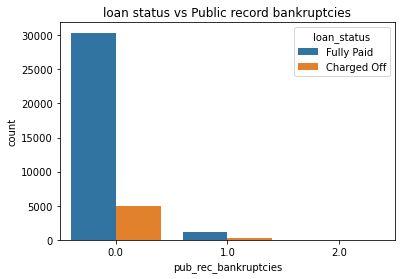

In [85]:
sns.countplot(data.pub_rec_bankruptcies, hue='loan_status', data=data)
plt.title('loan status vs Public record bankruptcies')

#### Observations:
Most borrower are of fully paid status.

Text(0.5, 1.0, 'Purpose vs Public record bankruptcies')

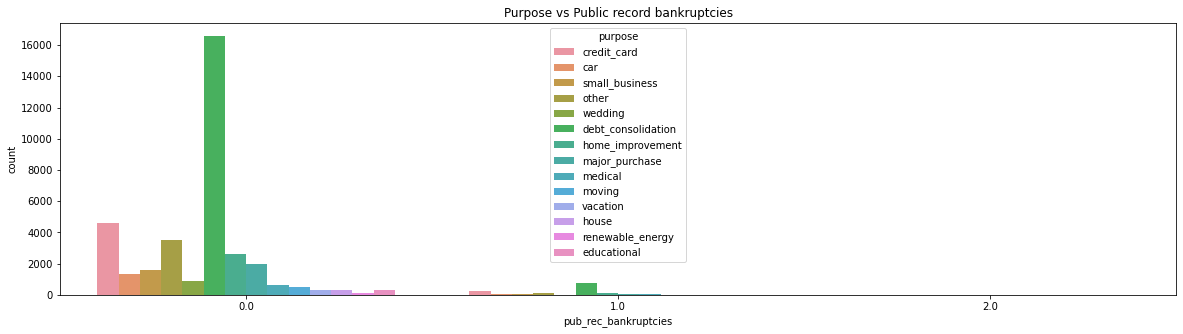

In [86]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='purpose', data=data)
plt.title('Purpose vs Public record bankruptcies')

#### Observations:
ther is large amount of borrower belongs to debt consolidation category.

Text(0.5, 1.0, 'Employee length vs Public record bankruptcies')

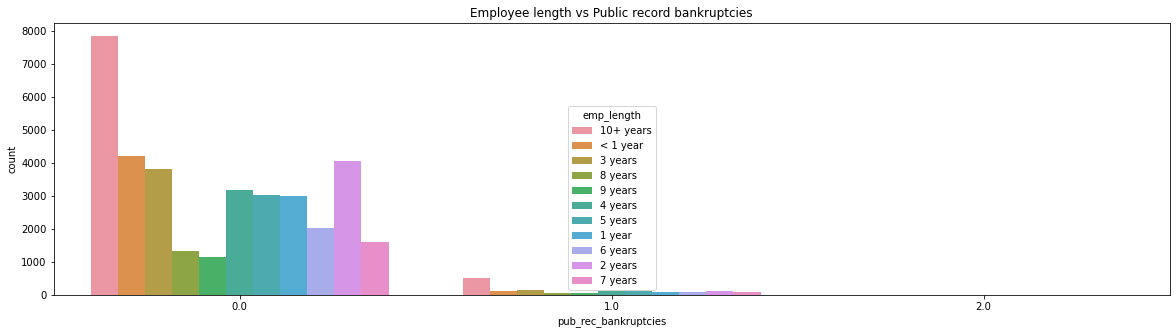

In [87]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='emp_length', data=data)
plt.title('Employee length vs Public record bankruptcies')

#### Observations:
There is largeamount of borrowers belong to 10 + year category of emp length.

### inq_last_6mths

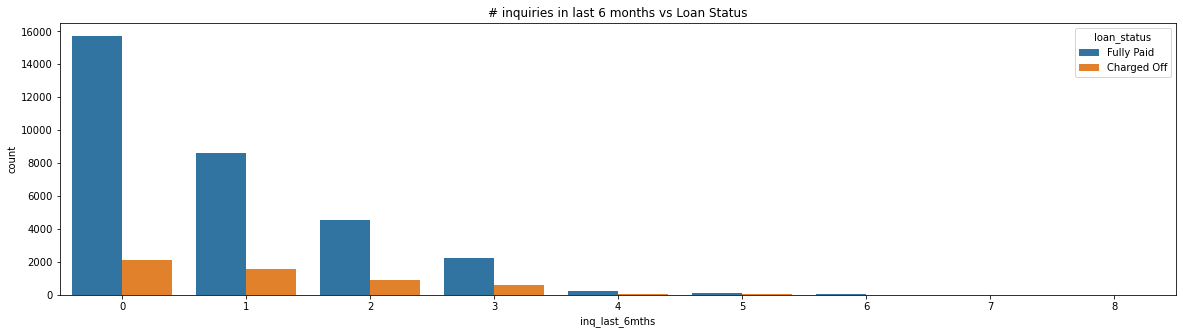

In [88]:
plt.figure(figsize=(20,5))
sns.countplot(data.inq_last_6mths, hue='loan_status', data=data)
plt.title('# inquiries in last 6 months vs Loan Status')
plt.show()

### Approval Loan Amount Ratio

Text(0.5, 1.0, 'emp_length vs Approval Loan Amount Ratio')

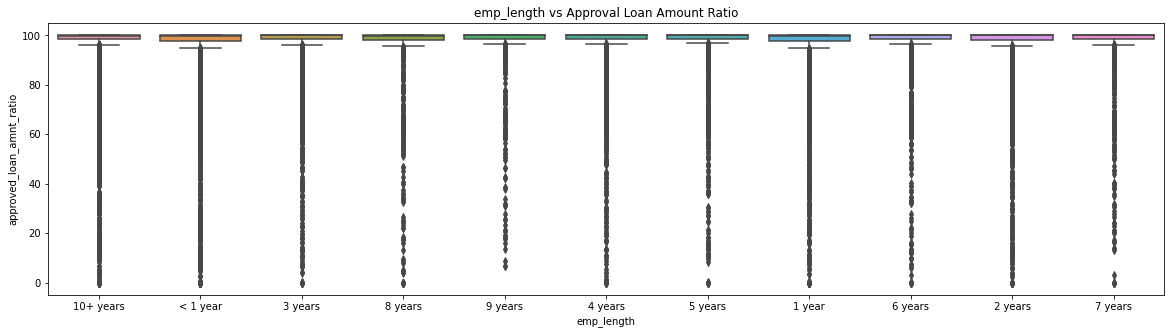

In [89]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.approved_loan_amnt_ratio, data=data)
plt.title('emp_length vs Approval Loan Amount Ratio')

#### Observations:
There is not much relation between approval of loan amount ratio and employment length

Text(0.5, 1.0, 'Purpose vs Approval Loan Amount Ratio')

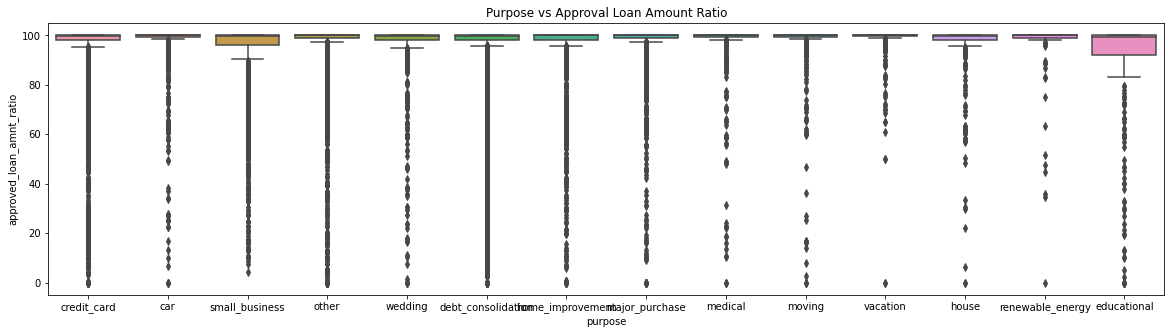

In [90]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.approved_loan_amnt_ratio, data=data)
plt.title('Purpose vs Approval Loan Amount Ratio')

#### Observations:
The Funded amount by investors is lower than requested loan amount in education and small business purposes.

Text(0.5, 1.0, 'Home Ownership vs Approval Loan Amount Ratio')

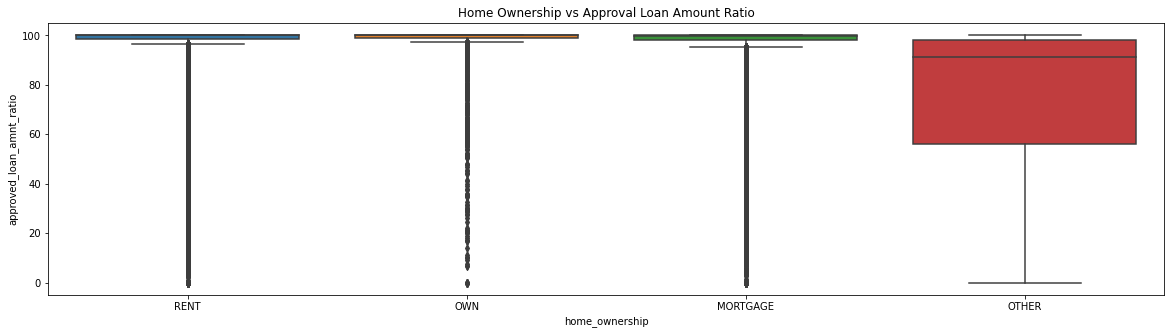

In [91]:
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y=data.approved_loan_amnt_ratio, data=data)
plt.title('Home Ownership vs Approval Loan Amount Ratio')

#### Observations:
Borrowers with Other home ownership are having less approved ratio which mean they got less amount than request amount.

# <font color='orange'> Bivariate Analysis </font>

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. 

### Term vs Loan Status

Text(0.5, 1.0, 'Term vs Loan status')

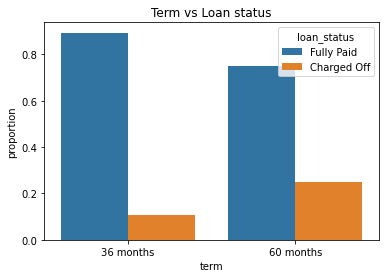

In [92]:
#Proportion of values for each category
df = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Term vs Loan status')

#### Observations:
There are more proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.

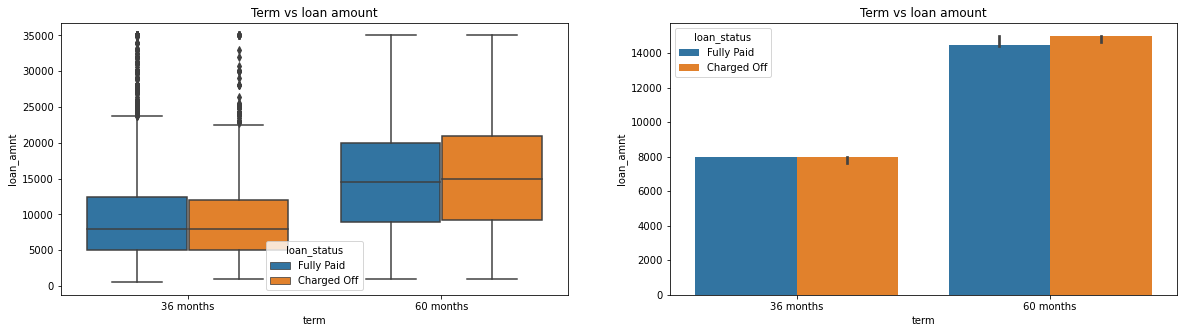

In [93]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

#### Observations:
Loan amount is not a decider for defaults in both 36 adn 60 months. Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.

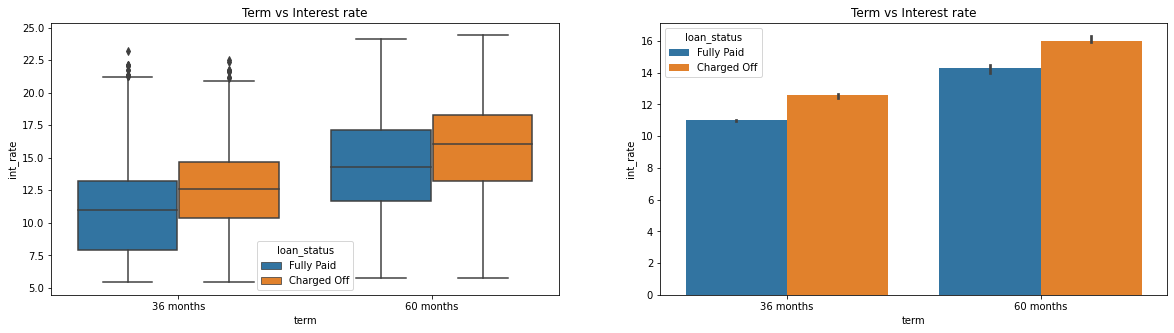

In [94]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

#### Observations:
For higher interest rates the default rate is higher in both 36 and 60 months tenure.

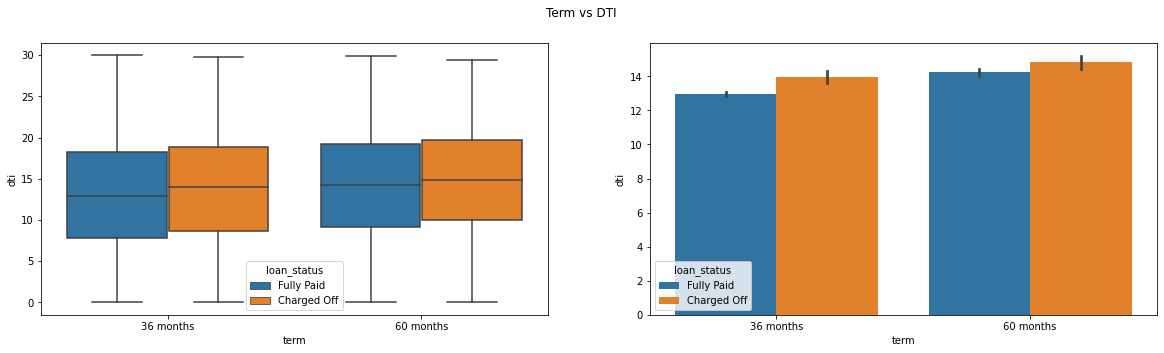

In [95]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

#### Observations:
Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio.

### Grade

Text(0.5, 1.0, 'Grade vs Loan status')

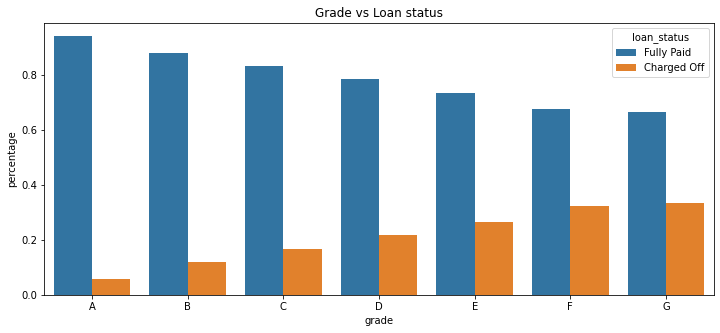

In [96]:
#Sorting Grades from A to G
grade_ord = data.grade.unique()
grade_ord.sort()

df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

#### Observations:
The above graph clearly says the Charged off increases as grades decreases.

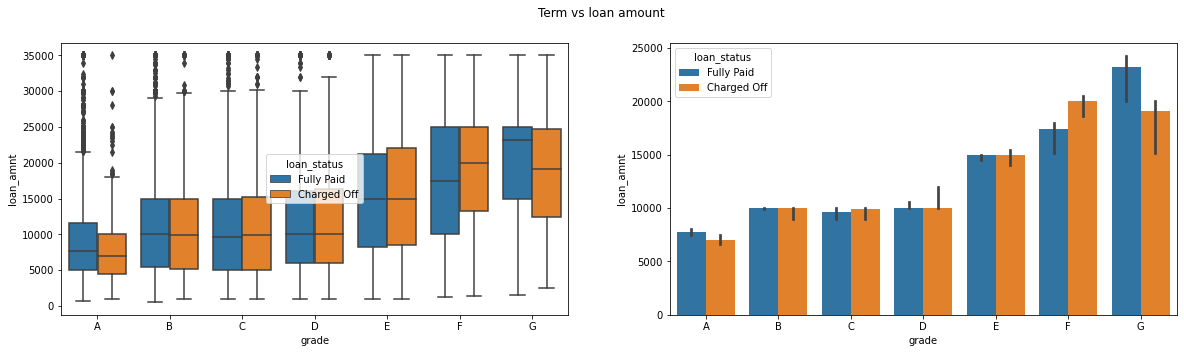

In [97]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

#### Observations:
For lower grades 'F' and 'G' there are more difference between charged-off and fully paid. The lower grade people has taken higher amount of loans and also they are more prone to default the loan.

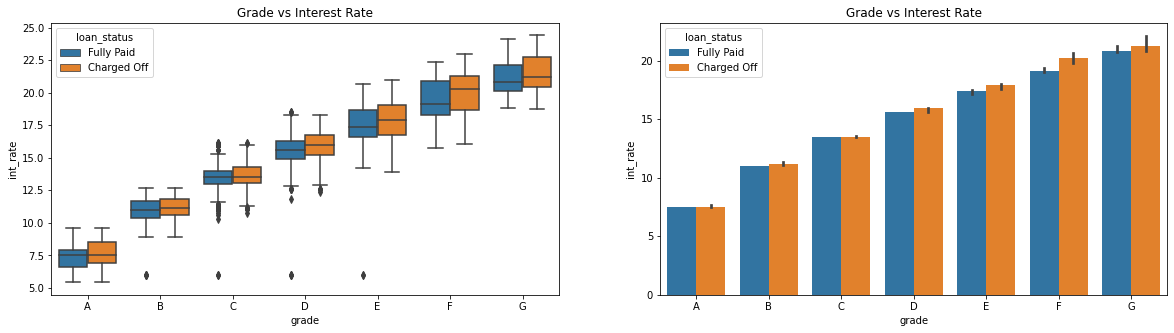

In [98]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

#### Observations:
As grade decreases the interest rate gradually increases. and they are more and more prone to default the loan.

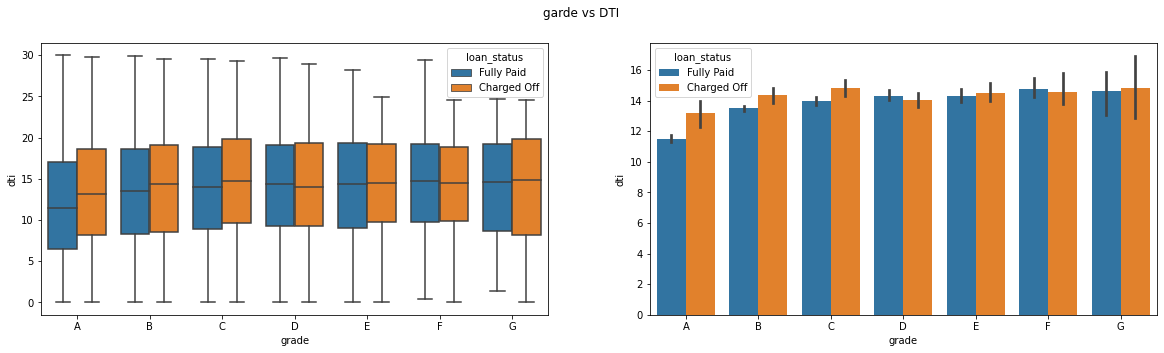

In [99]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=data, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

#### Observations:
There is not much change in dti in each grade and loan status.

### Employment Length

Text(0.5, 1.0, 'Grade vs Loan status')

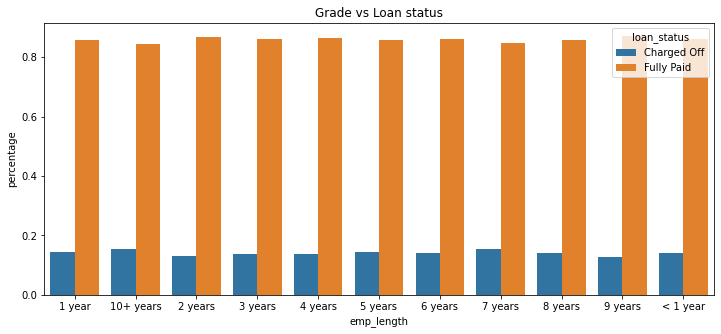

In [100]:
df = data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

#### Observations:
There is not big changes or pattern observed defaulters across employment lengths.

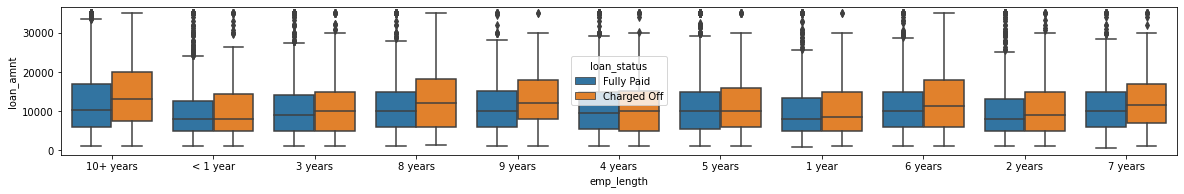

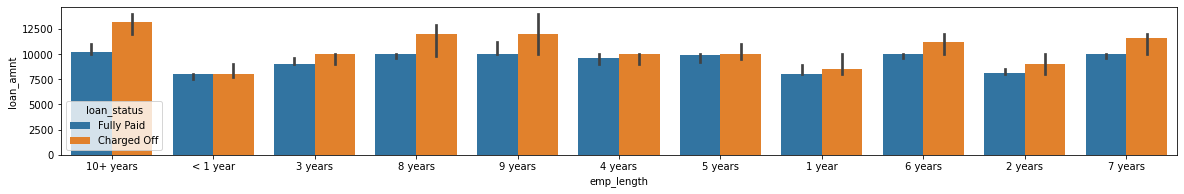

In [101]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.show()

#### Observations:
Borrowers with higher employment lengths and took more loan amounts got more default rate.

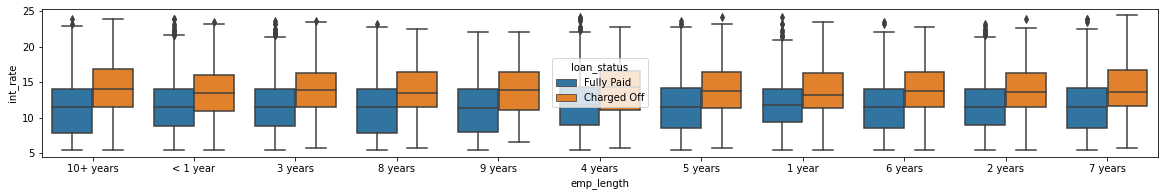

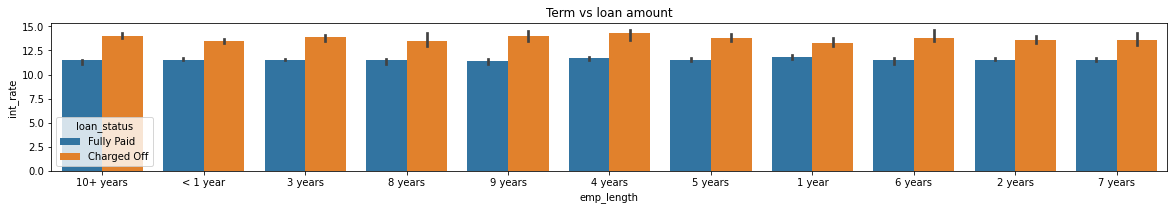

In [102]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=data)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

#### Observations:
Irrespective of employment length loans with more interest rates got defaulted more.

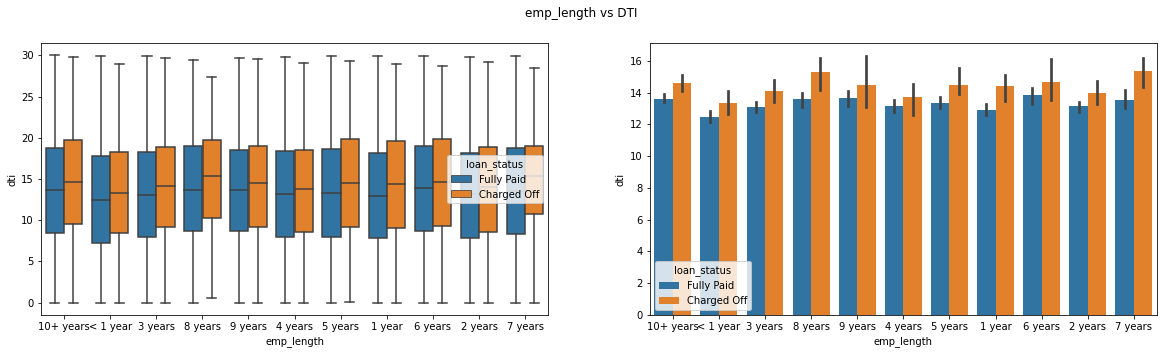

In [103]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('emp_length vs DTI')
plt.show()

#### Observations:
Employment Length and DTI are not showing any patterns towards defaults.

### Home Ownership

Text(0.5, 1.0, 'Home Ownership vs Loan status')

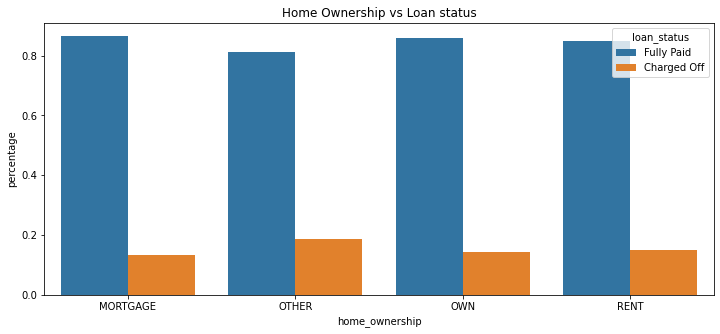

In [104]:
df = data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')

#### Observations:
There are bit high percentage of defaults are recorded in other home ownership category.

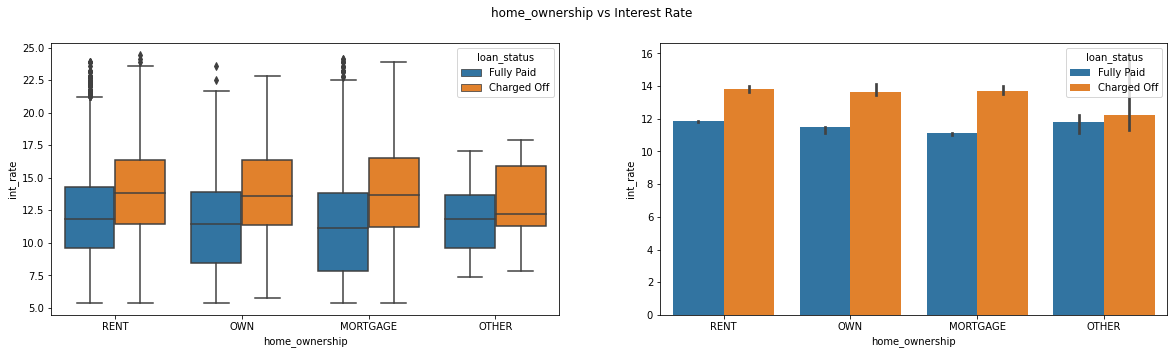

In [105]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

#### Observations:
Irrespictive of Home owner ship, when the interest rate is high the dafault rate also high.

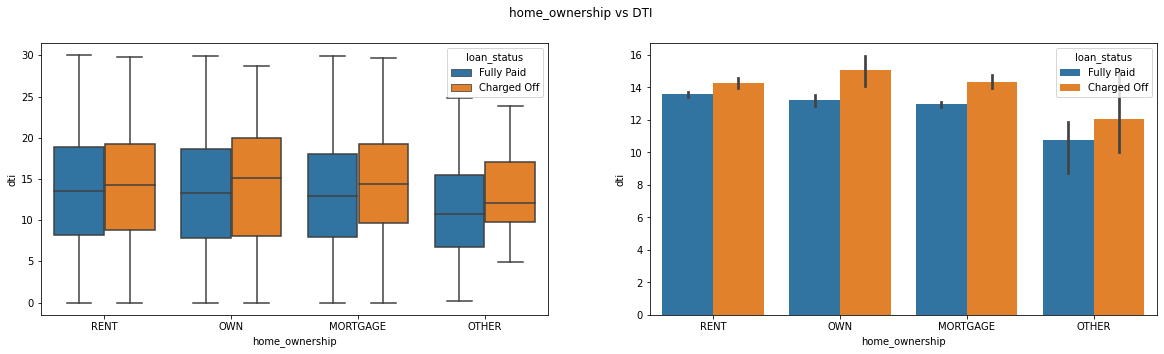

In [106]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

#### Observations:
Borrowers in other home ownership category has less dti than other categories. There is equal posibility of home owners defaulting for all the home ownerships.

### Address State

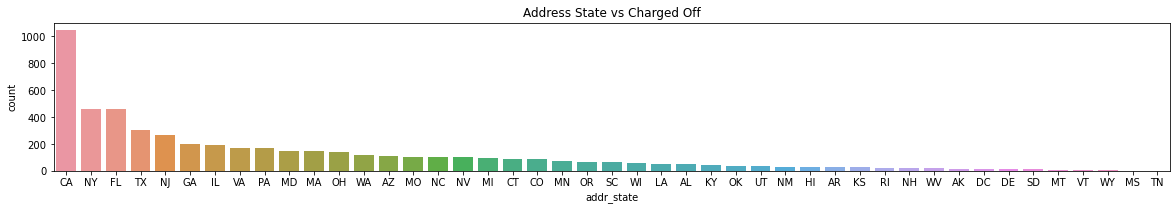

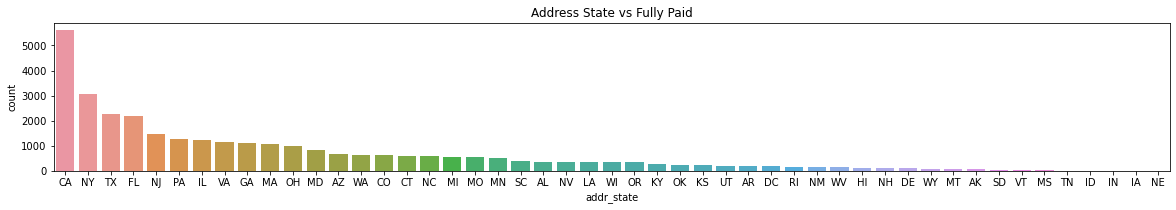

In [107]:
charged_off_df = data[data.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = data[data.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

#### Observations:
More number of borrowers defaulted in CA , FL and NY states

### Verfication Status

Text(0.5, 1.0, 'Grade vs Loan status')

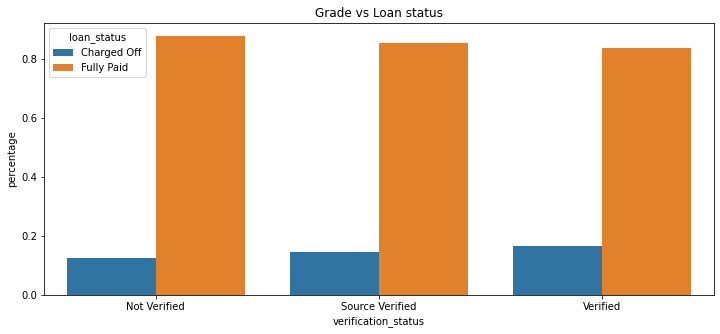

In [108]:
df = data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

#### Observations:
There is not  a large change in charged of loans for all varification status.

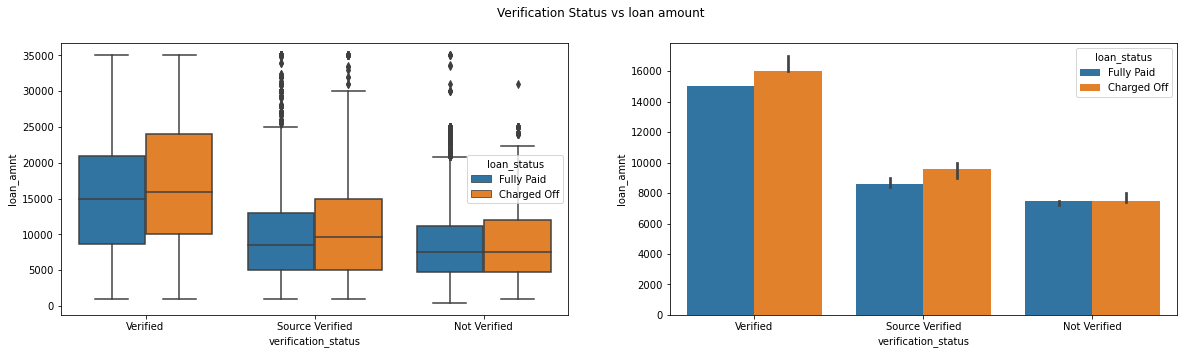

In [109]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

#### Observations:
There is difference between the verified & source verified borrowers in there loan amount when they are charged off

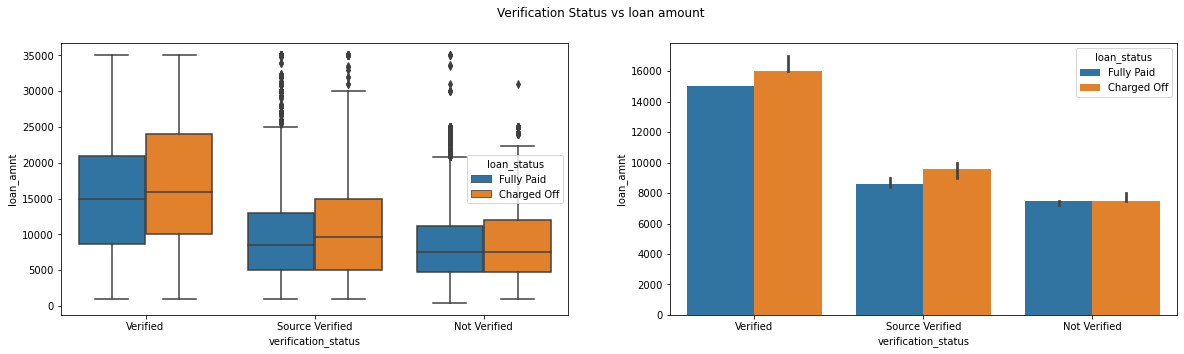

In [110]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

#### Observations:
Verified loans are given more loan amounts compared to others. 

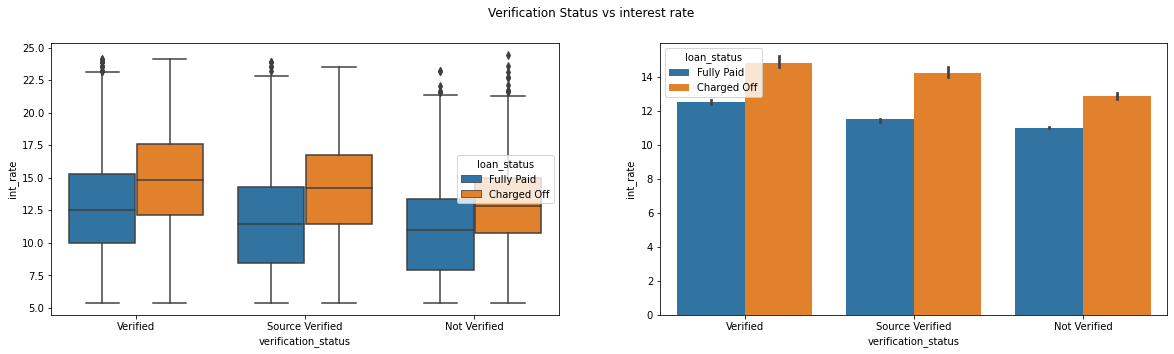

In [111]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

#### Observations:
Irrespective of verification status higher interest rates are incurring default of loan.

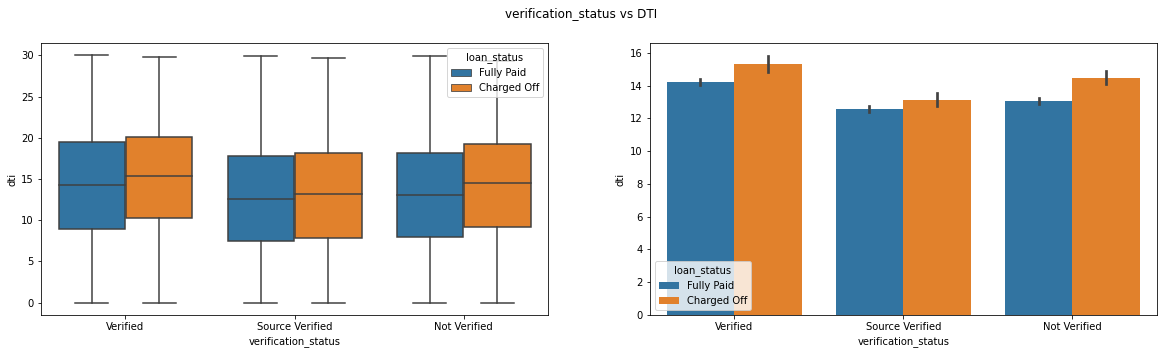

In [112]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

#### Observations:
There is slight increase in the dti mean for defaulted loans for all the verification status categories.

### Purpose

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

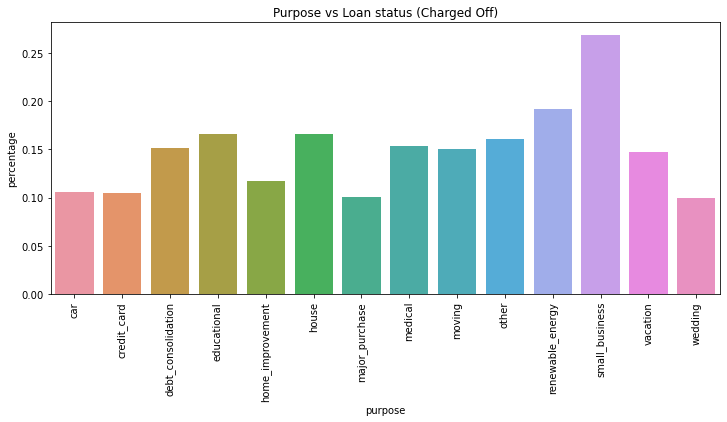

In [113]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

#### Observations:
Charged-off are higher for small_business comparitively.

<Figure size 432x288 with 0 Axes>

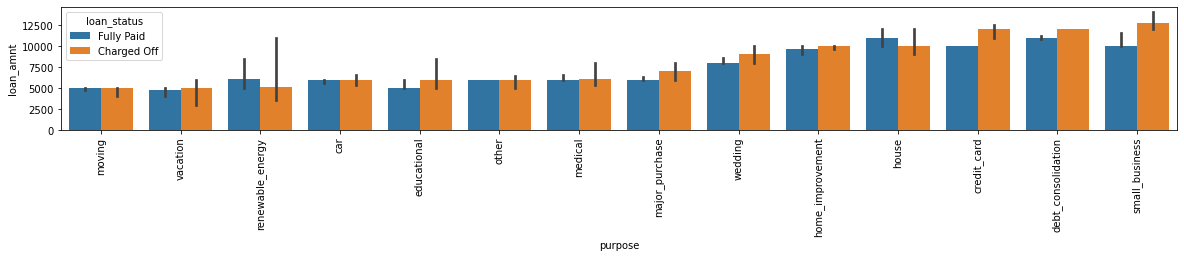

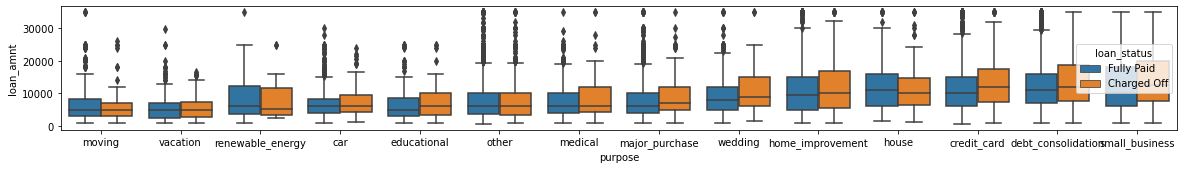

In [114]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

#### Observations:
Small Business has more defaults when the loan amount is also high.

<Figure size 432x288 with 0 Axes>

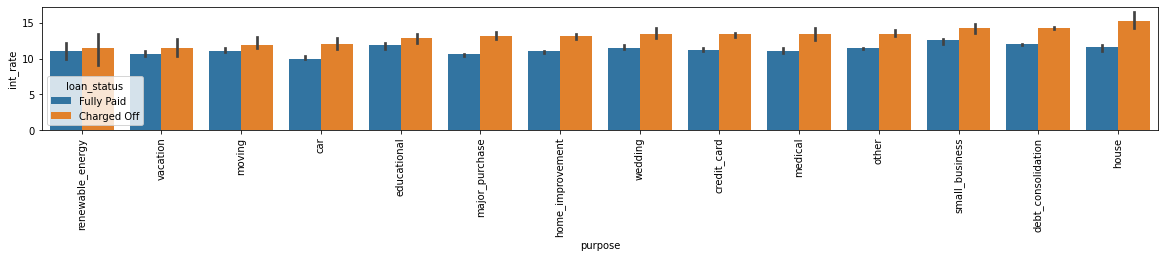

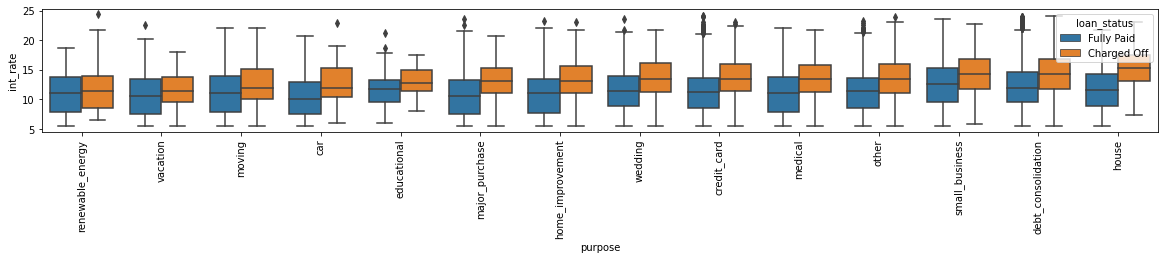

In [115]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= data, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

#### Observations:
Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.

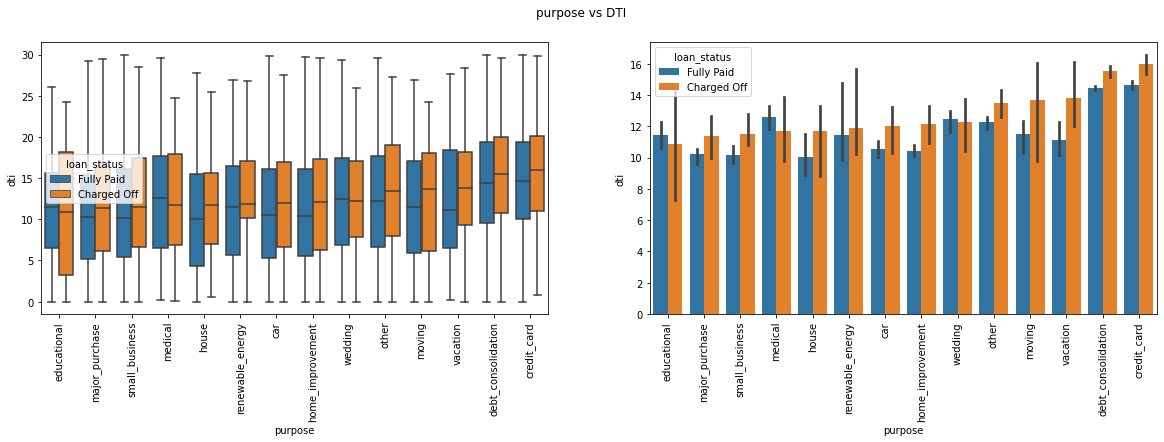

In [116]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=data, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

#### Observations:
Could not find any pattern from this plot.

### Loan Amount vs Interest Rate

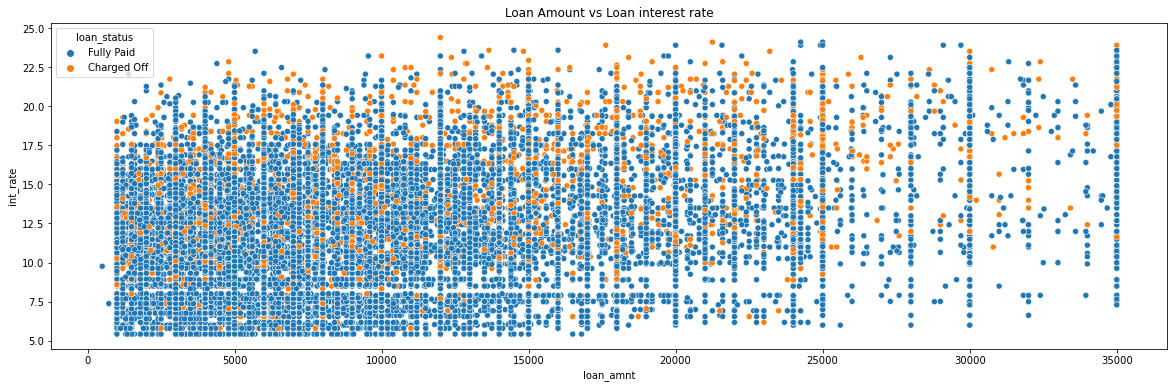

In [117]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=data, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

#### Observations:
Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

### Loan Amount vs Annual income

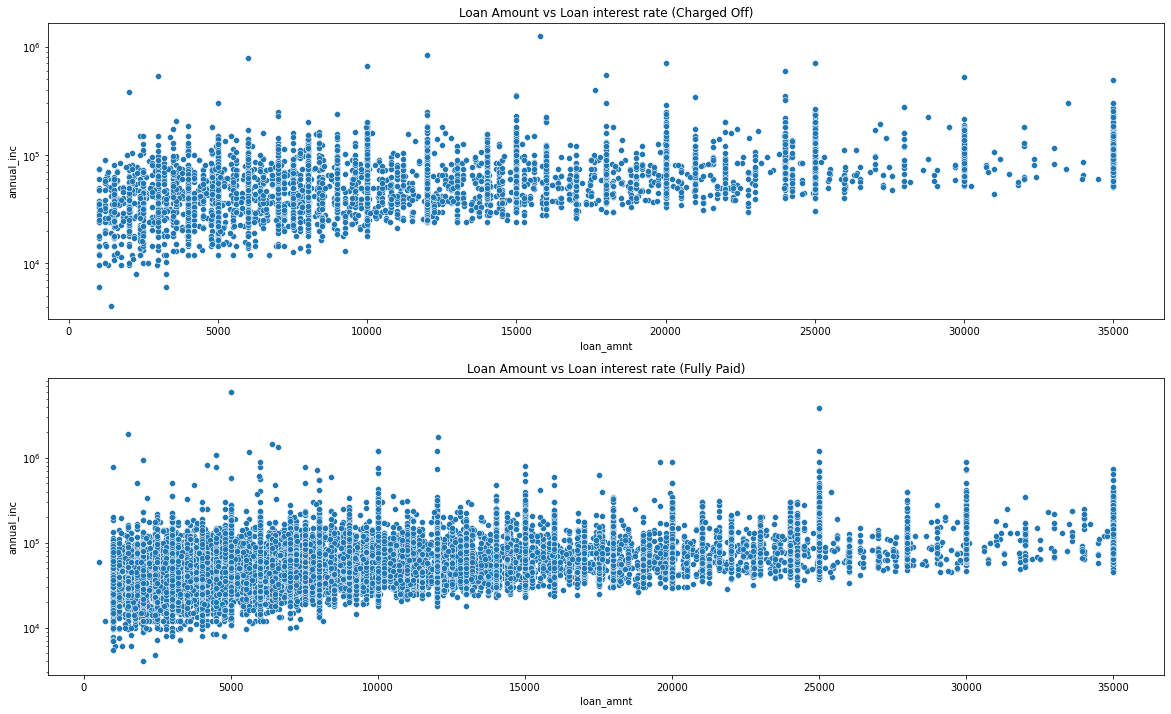

In [118]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

#### Observations:
Both Fully paid and Charged Off loans are having similar pattern versus Annual income. We can fit a linear pattern with a line which has very much less slope.

### Loan Amount vs DTI

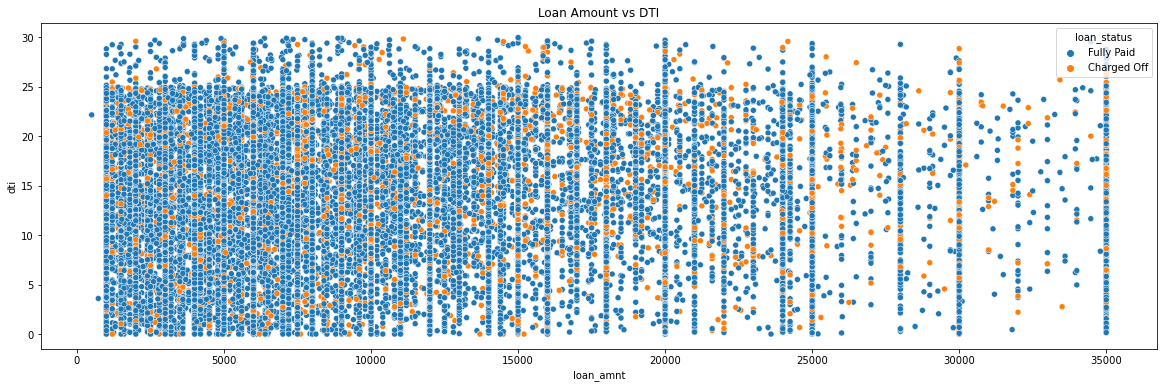

In [119]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=data, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

#### Observations:
Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

### Interest Rate vs DTI

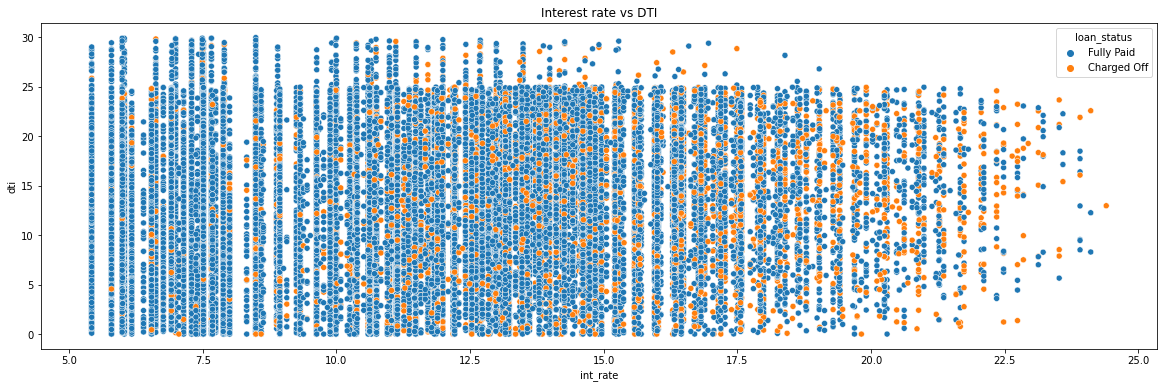

In [120]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=data, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

#### Observations:
Values are spread all accross, but we can see one thing here irrespective of DTI when interest rates are high charged off loans are high.

### Correlation Matrix
 finding the correlation between the variables of dataset

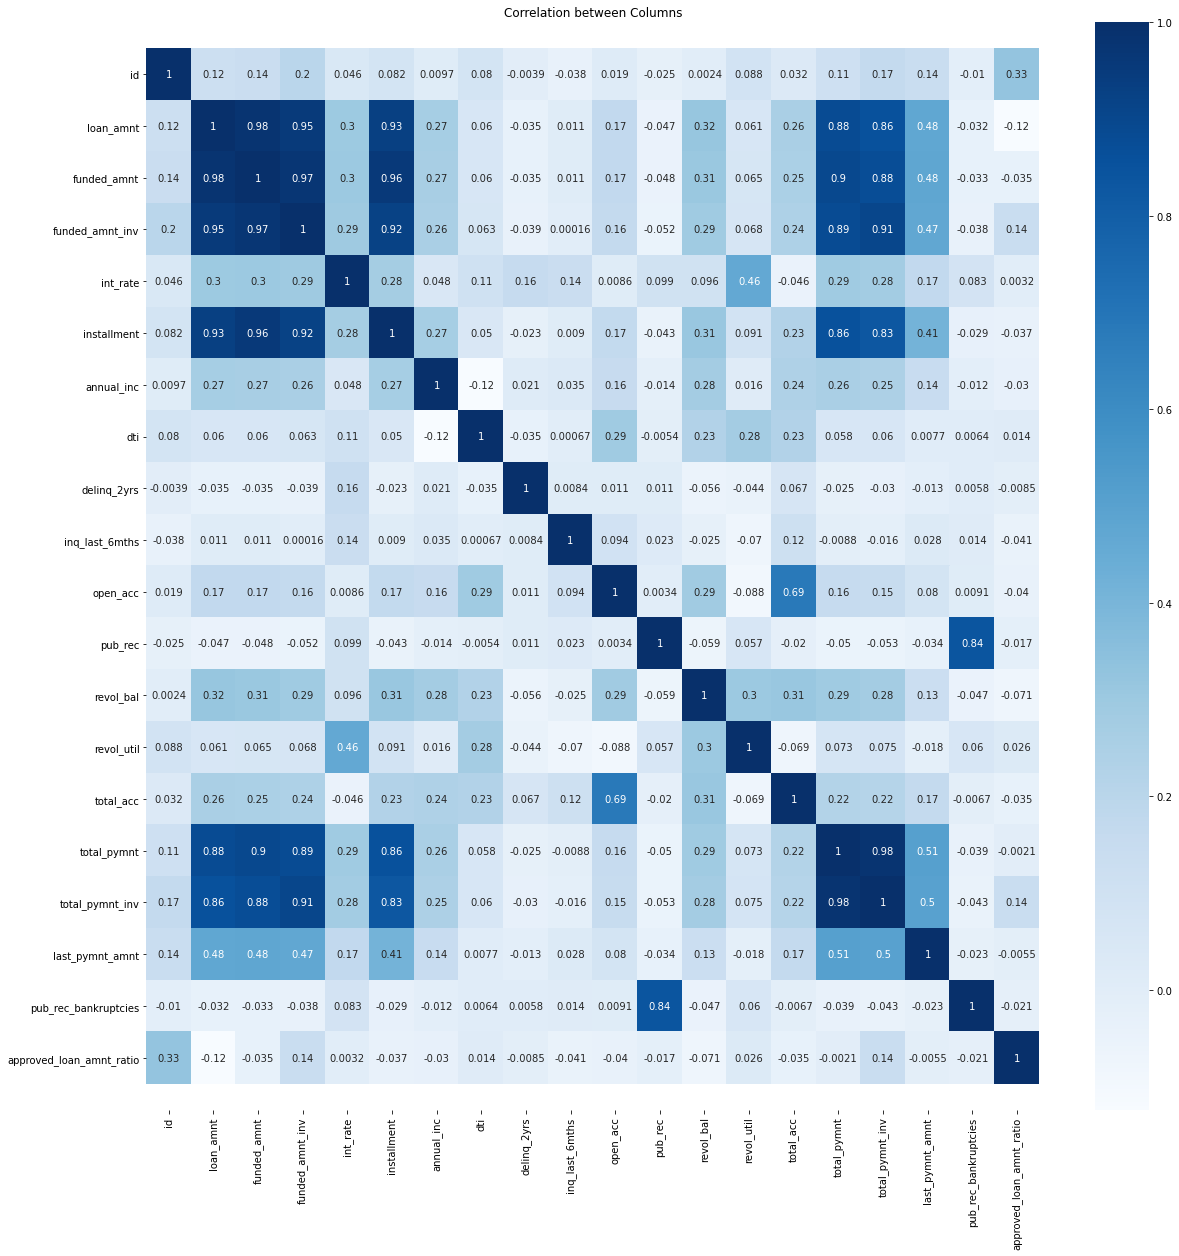

In [121]:
#Finding correlation matric
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

#### Observations:
The no. of derogatory public  records column is highly correlated with public bankruptcies records. <br>
Interest rates are high for people with high revol utilisation.

# Conclusion


1. irrespective of DTI when interest rates are high charged off loans are high.
2. Home loans with high interest rates are mostly defaulted.
3. Small Business has more defaults when the loan amount is also high.
4. Charged-off loan status are higher for small_business comparitively.
5. Irrespective of verification status higher interest rates are incurring default of loan.
6. More number of borrowers defaulted in CA , FL and NY states.
7. Irrespictive of Home owner ship, when the interest rate is high the dafault rate also high.
8. Irrespictive of employment length loans with more interest rates got defaulted more.
9. As grade decreases the interest rate gradually increases. and they are more and more prone to default the loan.
10. The lower grade people has taken higher amount of loans and also they are more prone to default the loan.
11. Interest rates are high for people with high revol utilisation.